In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/DA Project (Trân - Phúc)/

/content/drive/MyDrive/DA Project (Trân - Phúc)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime
import statsmodels.api as sm
import missingno as msno

###Covid

In [ ]:
covid_df = pd.read_csv("data/covid_19_india.csv")

In [ ]:
covid_df['State/UnionTerritory'].describe()

count      18110
unique        46
top       Kerala
freq         560
Name: State/UnionTerritory, dtype: object

In [ ]:
covid_df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [ ]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [ ]:
covid_df.describe()

,Sno,Cured,Deaths,Confirmed
count,18110.000000,1.811000e+04,18110.000000,1.811000e+04
mean,9055.500000,2.786375e+05,4052.402264,3.010314e+05
std,5228.051023,6.148909e+05,10919.076411,6.561489e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,4528.250000,3.360250e+03,32.000000,4.376750e+03
50%,9055.500000,3.336400e+04,588.000000,3.977350e+04
75%,13582.750000,2.788698e+05,3643.750000,3.001498e+05
max,18110.000000,6.159676e+06,134201.000000,6.363442e+06


In [ ]:
covid_df.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [ ]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [ ]:
covid_df.shape

(18110, 9)

In [ ]:
# drop "Sno","Time","ConfirmedIndianNational","ConfirmedForeignNational"
covid_df.drop(["Sno","Time","ConfirmedIndianNational","ConfirmedForeignNational"], inplace = True, axis = 1)

In [ ]:
covid_df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [ ]:
# Active case is the number active cases alives
covid_df['Active_Cases'] = covid_df['Confirmed'] - (covid_df['Cured'] + covid_df['Deaths'])
covid_df.tail()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active_Cases
18105,2021-08-11,Telangana,638410,3831,650353,8112
18106,2021-08-11,Tripura,77811,773,80660,2076
18107,2021-08-11,Uttarakhand,334650,7368,342462,444
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812,545
18109,2021-08-11,West Bengal,1506532,18252,1534999,10215


In [ ]:
covid_df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active_Cases
0,2020-01-30,Kerala,0,0,1,1
1,2020-01-31,Kerala,0,0,1,1
2,2020-02-01,Kerala,0,0,2,2
3,2020-02-02,Kerala,0,0,3,3
4,2020-02-03,Kerala,0,0,3,3


In [ ]:
covid_df.drop(columns = ['Date','State/UnionTerritory']).corr()

,Cured,Deaths,Confirmed,Active_Cases
Cured,1.000000,0.917529,0.997751,0.562675
Deaths,0.917529,1.000000,0.918346,0.519351
Confirmed,0.997751,0.918346,1.000000,0.616554
Active_Cases,0.562675,0.519351,0.616554,1.000000


####Percentage of 20 State/UnionTerritory in COVID-19 Data

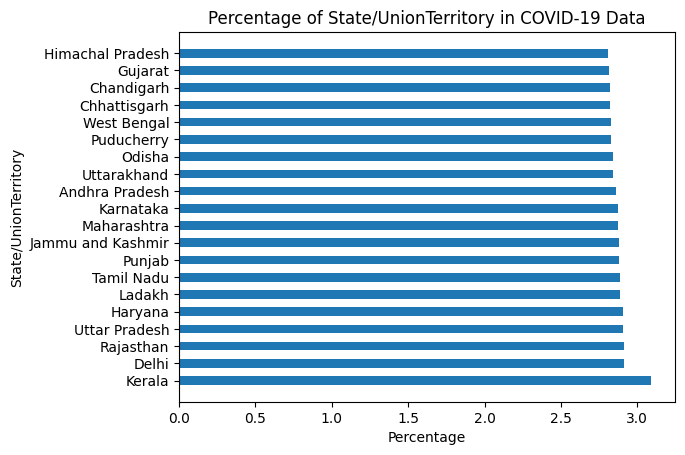

In [ ]:
counts = covid_df['State/UnionTerritory'].value_counts()
percentage = counts / counts.sum() * 100
State_fre = percentage.to_frame('Percentage').iloc[:20]

# plt.figure(figsize=(40,20))
plt.barh(State_fre.index, State_fre['Percentage'], height=0.5)

plt.xlabel('Percentage')
plt.ylabel('State/UnionTerritory')

plt.title('Percentage of State/UnionTerritory in COVID-19 Data')

# Hiển thị biểu đồ
plt.show()


######Comment

The chart you provided depicts the percentage distribution of COVID-19 data across various states and union territories in India. It is a horizontal bar chart where each bar represents a state or a union territory. The length of the bar indicates the percentage share of some COVID-19 related data for that region.

**Here are a few observations:**

* Kerala has the longest bar, indicating that it has the highest percentage relative to other states/union territories in this particular dataset. The percentage for Kerala is just under 3.0%.

* Delhi follows Kerala closely, with a percentage slightly above 2.5%.

* On the lower end, Himachal Pradesh has the shortest bar, suggesting it has the smallest percentage in this dataset, just under 0.5%.

* Many of the states, including Uttar Pradesh, Punjab, Maharashtra, Karnataka, Andhra Pradesh, and others, have percentage figures generally clustering around the 1.0% to 1.75% range.


####The frequency of Active Cases

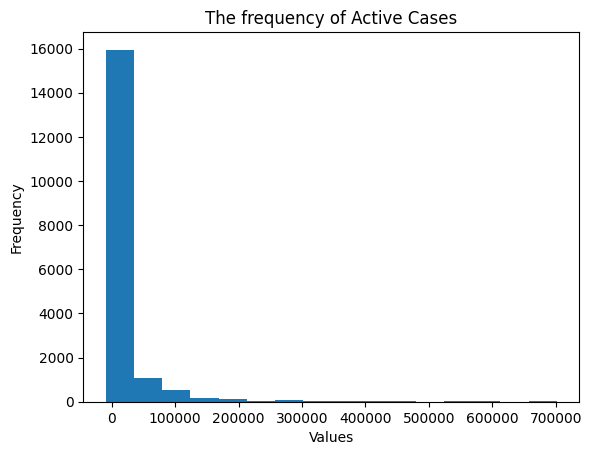

In [ ]:
import matplotlib.pyplot as plt
# Sturges rule
bins = int(np.ceil(1 + np.log2(len(covid_df['Active_Cases']))))

plt.hist(covid_df['Active_Cases'], bins = bins)

plt.xlabel('Values')
plt.ylabel('Frequency')

plt.title('The frequency of Active Cases')

# Hiển thị biểu đồ
plt.show()

#####Comment

The chart you provided is a bar graph titled "The frequency of Active Cases," which appears to reflect the distribution of some dataset related to active cases (possibly a health-related context, like infections or similar events).

**Skewed Distribution (Skedwed Right):**

* The distribution of active cases is heavily right-skewed, meaning the majority of the values are clustered near the lower end of the scale. This skewness indicates that most of the observed active cases are relatively small in number.

**High Frequency of Low Values:**

* The bar corresponding to the lowest interval (0 to 100,000) is significantly taller than the other bars, suggesting that a vast majority of the data points (active cases) fall within this range.

**Rapid Decrease in Frequency:**

* There's a stark drop in frequency as the value increases. After the initial interval (0 to 100,000), the subsequent intervals (100,000 to 200,000, 200,000 to 300,000, etc.) show drastically fewer cases, with each step seeing a further reduction in frequency.

**Small Numbers of High Values:**

* The intervals on the higher end (from 300,000 to 700,000) have very few active cases, indicating that while most recorded cases are low, there are rare instances where the values are extremely high.


#### The correlation betwwen Confirmed and Cured

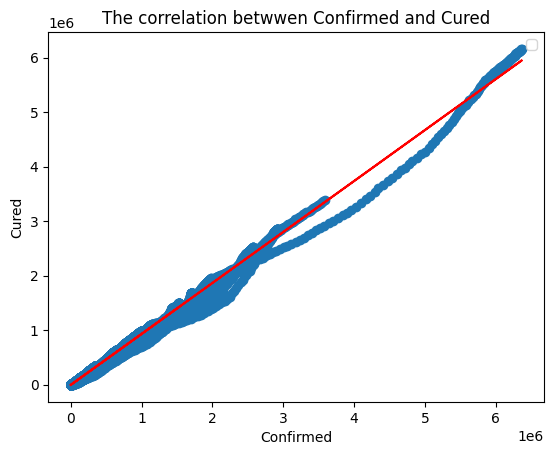

In [ ]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(20,10))

coefficients = np.polyfit(covid_df['Confirmed'], covid_df['Cured'], 1)
slope = coefficients[0] #m
intercept = coefficients[1]#b
regression_line = [slope * i + intercept for i in covid_df['Confirmed']]
plt.scatter(covid_df['Confirmed'], covid_df['Cured'])

plt.plot(covid_df['Confirmed'], regression_line, color='red')

plt.xlabel('Confirmed')
plt.ylabel('Cured')
plt.title('The correlation betwwen Confirmed and Cured')
plt.legend()

# Hiển thị biểu đồ
plt.show()

##### Comments

This scatter plot shows the relationship between the number of confirmed cases and the number of cured cases. Both axes range from 0 to 1 million. The red line (regresion line) represents a proportional increasing trend between these two numbers, showing that as the number of confirmed cases increases, the number of cured cases also increases correspondingly. The blue overlay in the chart shows the distribution of the data around the trend line


 --> **Linear regression**

###### Model

In [ ]:
print('Model is y = '+ str(slope)+'x + '+ str(intercept))

Model is y = 0.9350131695018736x + -2830.8070810425456


In [ ]:
sm.OLS(covid_df['Confirmed'], covid_df['Cured']).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Confirmed   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          4.821e+06
Date:                Sun, 12 May 2024   Prob (F-statistic):                        0.00
Time:                        02:18:33   Log-Likelihood:                     -2.1939e+05
No. Observations:               18110   AIC:                                  4.388e+05
Df Residuals:                   18109   BIC:                                  4.388e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Cured          1.0674      0.000   2195.606      0.000       1.066       1.068
==============================================================================
Omnibus:                    18696.468   Durbin-Watson:                   1.471
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1793819.847
Skew:                           5.025   Prob(JB):                         0.00
Kurtosis:                      50.710   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the results of the OLS regression model, we can see that the R-squared (R-quadrat) value is 0.996. This shows that there is a strong linear relationship between the Confirmed variable and the Cured variable.

The R-squared value is a measure that indicates the proportion of the variance of the Confirmed variable that can be explained by a linear regression model with the Cured variable. In this case, the R-squared value is 0.996, which means 99.6% of the variation in the Confirmed variable can be explained by the Cured variable in the regression model.

The coefficients of the model are displayed in the results table. According to the table, the coefficient of the Cured variable is 1.0674, with a standard deviation of 0.000. This shows that each unit increase in the Cured variable corresponds to one unit increase in the Confirmed variable.

From this result, we can conclude that there is a strong linear relationship between the Confirmed variable and the Cured variable in the analyzed data.

#### The correlation betwwen Confirmed and Dearhs

In [ ]:
coefficients

array([ 9.35013170e-01, -2.83080708e+03])

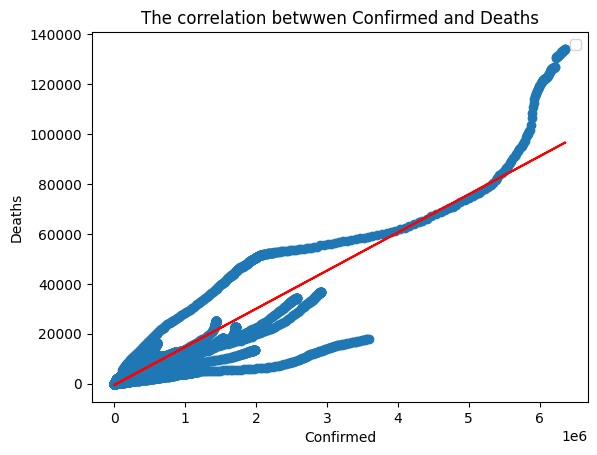

In [ ]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(20,10))

coefficients = np.polyfit(covid_df['Confirmed'], covid_df['Deaths'], 1)
slope = coefficients[0]
intercept = coefficients[1]
regression_line = [slope * i + intercept for i in covid_df['Confirmed']]
plt.scatter(covid_df['Confirmed'], covid_df['Deaths'])

plt.plot(covid_df['Confirmed'], regression_line, color='red')

plt.xlabel('Confirmed')
plt.ylabel('Deaths')
plt.title('The correlation betwwen Confirmed and Deaths')
plt.legend()

# Hiển thị biểu đồ
plt.show()

#### Comments

This scatter plot shows the relationship between the number of confirmed cases and the number of deaths cases. Both axes range from 0 to 1 million. The red line (regression line) shows a proportional increasing trend between these two numbers, showing that as the number of confirmed cases increases, the number of recovered cases also increases correspondingly. The blue overlay in the chart shows the distribution of data around the trend line, for example, the change in cure rate compared to confirmed cases.
   **--> Linear regression**

In [ ]:
print('Model is y = '+ str(slope)+'x + '+ str(intercept))

Model is y = 0.015282332076660719x + -548.0595842069376


##### **Model**

In [ ]:
sm.OLS(covid_df['Confirmed'], covid_df['Deaths']).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Confirmed   R-squared (uncentered):                   0.860
Model:                            OLS   Adj. R-squared (uncentered):              0.860
Method:                 Least Squares   F-statistic:                          1.117e+05
Date:                Sun, 12 May 2024   Prob (F-statistic):                        0.00
Time:                        02:18:34   Log-Likelihood:                     -2.5216e+05
No. Observations:               18110   AIC:                                  5.043e+05
Df Residuals:                   18109   BIC:                                  5.043e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Deaths        57.4975      0.172    334.213      0.000      57.160      57.835
==============================================================================
Omnibus:                    12560.074   Durbin-Watson:                   1.582
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           507516.046
Skew:                           2.835   Prob(JB):                         0.00
Kurtosis:                      28.307   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the OLS regression results, we can see that the R-squared value is 0.860, indicating that approximately 86% of the variance in the Confirmed variable can be explained by the Cured variable in the model. This suggests a strong positive correlation between Confirmed and Cured.

The F-statistic is 1.117e+05, with a probability value of 0.00, indicating that the linear relationship between Confirmed and Cured is statistically significant. This supports the finding of a strong linear relationship between the two variables.

The coefficient of the Cured variable is 57.4975, with a standard error of 0.172. This suggests that for every unit increase in the Cured variable, the Confirmed variable is predicted to increase by approximately 57.4975 units.

Overall, the OLS regression results suggest a strong positive correlation between Confirmed and Cured. However, the presence of autocorrelation, departure from normality, skewness, and kurtosis in the data should be taken into consideration when interpreting the results.

####Find the higgest all for Confirmed, Cured Deaths based on State/UnionTerritory and Recovery Rate, Mortality Rate

In [ ]:
# (each State/UnionTerritory find the higgest confirmed, cured, deaths) với mỗi State/UnionTerritory tòm ra confirmed, cured, deaths lớn nhất
statewise = pd.pivot_table(covid_df, values = ["Cured","Deaths","Confirmed","Date"],
                           index = "State/UnionTerritory", aggfunc = max)
statewise

,Confirmed,Cured,Date,Deaths
State/UnionTerritory,,,,
Andaman and Nicobar Islands,7548,7412,2021-08-11,129
Andhra Pradesh,1985182,1952736,2021-08-11,13564
Arunachal Pradesh,50605,47821,2021-08-11,248
Assam,576149,559684,2021-08-11,5420
Bihar,725279,715352,2021-08-11,9646
Bihar****,715730,701234,2021-06-11,9452
Cases being reassigned to states,9265,0,2020-07-18,0
Chandigarh,61992,61150,2021-08-11,811
Chhattisgarh,1003356,988189,2021-08-11,13544


####Find Recovery Rate &	Mortality Rate

In [ ]:
statewise["Recovery Rate"] = statewise['Cured']*100 / statewise['Confirmed']
statewise["Mortality Rate"] = statewise['Deaths']*100 / statewise['Confirmed']

In [ ]:
statewise

,Confirmed,Cured,Date,Deaths,Recovery Rate,Mortality Rate
State/UnionTerritory,,,,,,
Andaman and Nicobar Islands,7548,7412,2021-08-11,129,98.198198,1.709062
Andhra Pradesh,1985182,1952736,2021-08-11,13564,98.365591,0.683262
Arunachal Pradesh,50605,47821,2021-08-11,248,94.498567,0.490070
Assam,576149,559684,2021-08-11,5420,97.142232,0.940729
Bihar,725279,715352,2021-08-11,9646,98.631285,1.329971
Bihar****,715730,701234,2021-06-11,9452,97.974655,1.320610
Cases being reassigned to states,9265,0,2020-07-18,0,0.000000,0.000000
Chandigarh,61992,61150,2021-08-11,811,98.641760,1.308233
Chhattisgarh,1003356,988189,2021-08-11,13544,98.488373,1.349870


In [ ]:
statewise = statewise.sort_values(by = "Confirmed", ascending=False)
statewise

,Confirmed,Cured,Date,Deaths,Recovery Rate,Mortality Rate
State/UnionTerritory,,,,,,
Maharashtra,6363442,6159676,2021-08-11,134201,96.797865,2.108937
Maharashtra***,6229596,6000911,2021-07-21,130753,96.329056,2.098900
Kerala,3586693,3396184,2021-08-11,18004,94.688450,0.501967
Karnataka,2921049,2861499,2021-08-11,36848,97.961349,1.261465
Karanataka,2885238,2821491,2021-07-20,36197,97.790581,1.254559
Tamil Nadu,2579130,2524400,2021-08-11,34367,97.877967,1.332504
Andhra Pradesh,1985182,1952736,2021-08-11,13564,98.365591,0.683262
Uttar Pradesh,1708812,1685492,2021-08-11,22775,98.635309,1.332797
West Bengal,1534999,1506532,2021-08-11,18252,98.145471,1.189056


In [ ]:
# transfer Date to end of table
statewise = statewise.reindex(columns=[col for col in statewise.columns if col != 'Date'] + ['Date'])

statewise.style.background_gradient(cmap = "cubehelix")

,Confirmed,Cured,Deaths,Recovery Rate,Mortality Rate,Date
State/UnionTerritory,,,,,,
Maharashtra,6363442,6159676,134201,96.797865,2.108937,2021-08-11
Maharashtra***,6229596,6000911,130753,96.329056,2.098900,2021-07-21
Kerala,3586693,3396184,18004,94.688450,0.501967,2021-08-11
Karnataka,2921049,2861499,36848,97.961349,1.261465,2021-08-11
Karanataka,2885238,2821491,36197,97.790581,1.254559,2021-07-20
Tamil Nadu,2579130,2524400,34367,97.877967,1.332504,2021-08-11
Andhra Pradesh,1985182,1952736,13564,98.365591,0.683262,2021-08-11
Uttar Pradesh,1708812,1685492,22775,98.635309,1.332797,2021-08-11
West Bengal,1534999,1506532,18252,98.145471,1.189056,2021-08-11


######Comment

The table showcasing COVID-19 related statistics for various states and union territories of India. Here’s a detailed analysis of the matrix in terms of its components:

**Matrix Content:**
***Columns***:
*  State/UT: Lists the names of Indian states and union territories.
*  Confirmed: The total number of confirmed COVID-19 cases.
* Cured: The total number of individuals who have recovered from COVID-19.
* Deaths: The total number of deaths caused by COVID-19.
* Recovery Rate: The percentage of recovered cases out of the total confirmed cases.
* Mortality Rate: The percentage of deaths out of the total confirmed cases.
* Date: The date on which these statistics were updated (in YYYY-MM-DD).


**Data Insights:**
* States like Maharashtra, Kerala, and Karnataka show high numbers in confirmed cases, indicating they were heavily affected.
* The Recovery Rate is high across the board, with most states showing rates above 90%, indicative of effective recovery management.
* The Mortality Rate varies more, but most states have a rate below 2%, which is relatively low.
* The latest data is from different dates, mostly around 2021-08-11, which suggests this snapshot was created around mid-August 2021.

**Conclusion:**

The matrix is a comprehensive summary of the COVID-19 pandemic status as per the given date in 2021 across various Indian states, showing the extent of confirmed cases, recoveries, and deaths.

####Describe the data between Recovery Rate and Mortality Rate

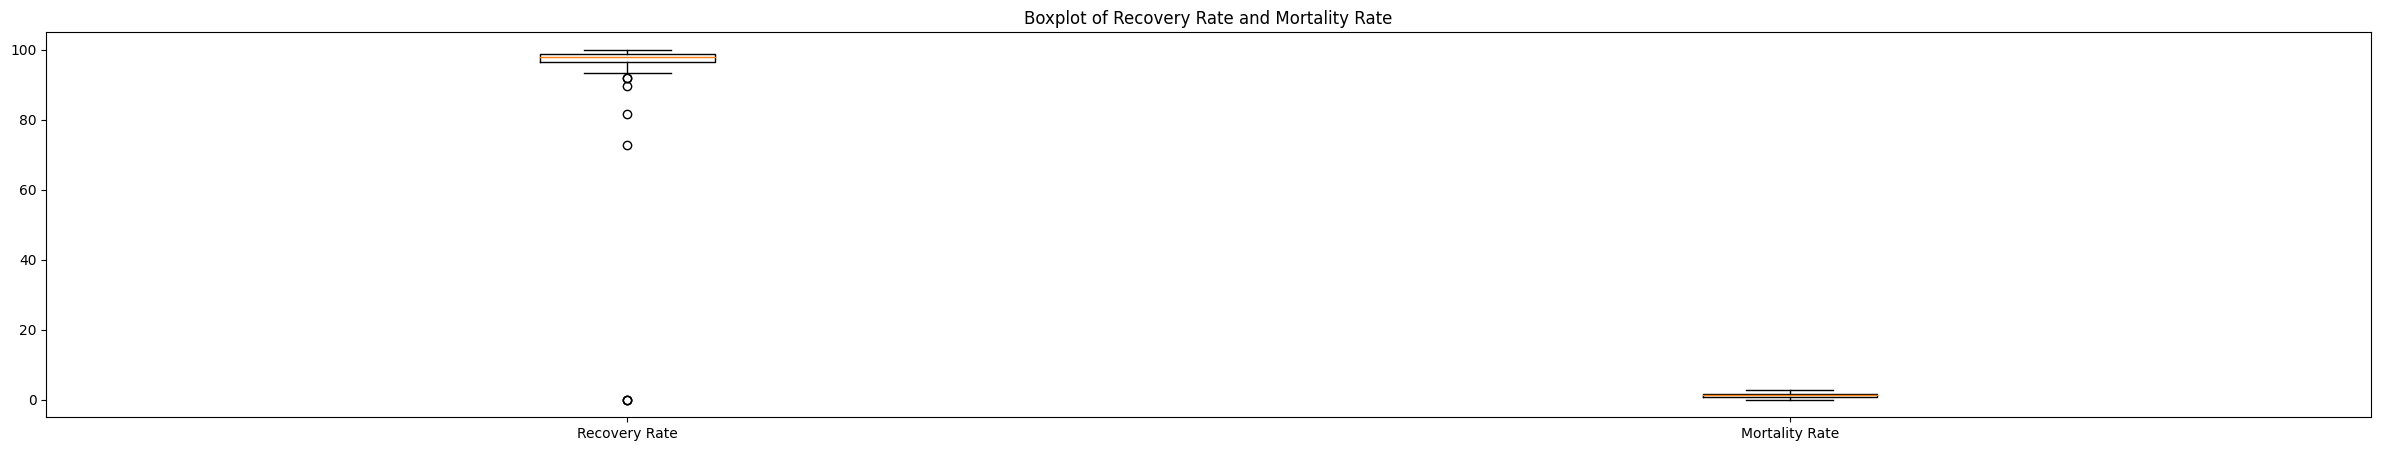

In [ ]:
plt.figure(figsize=(30,5))
recovery_rate = statewise['Recovery Rate']
mortality_rate = statewise['Mortality Rate']

data = [recovery_rate, mortality_rate]

plt.boxplot(data)

plt.xticks([1, 2], ['Recovery Rate', 'Mortality Rate'])

plt.title('Boxplot of Recovery Rate and Mortality Rate')

plt.show()

#####Comments

There are two variations represented on the x and y axis: Recovery Rate and Death Rate. It can be seen that there is no clearly defined linear model between these two variables. Although there is no linear relationship, it can be observed that as the Recovery Rate increases, the Death Rate decreases.

####Correlation between Recovery Rate and Mortality Rate

In [ ]:
statewise.drop(columns=['Date']).corr().style.background_gradient(cmap = "cubehelix")

,Confirmed,Cured,Deaths,Recovery Rate,Mortality Rate
Confirmed,1.000000,0.999895,0.937591,0.191470,0.277118
Cured,0.999895,1.000000,0.937841,0.194196,0.279815
Deaths,0.937591,0.937841,1.000000,0.146987,0.382672
Recovery Rate,0.191470,0.194196,0.146987,1.000000,0.508459
Mortality Rate,0.277118,0.279815,0.382672,0.508459,1.000000


<ipython-input-36-0988a2a6fe59>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


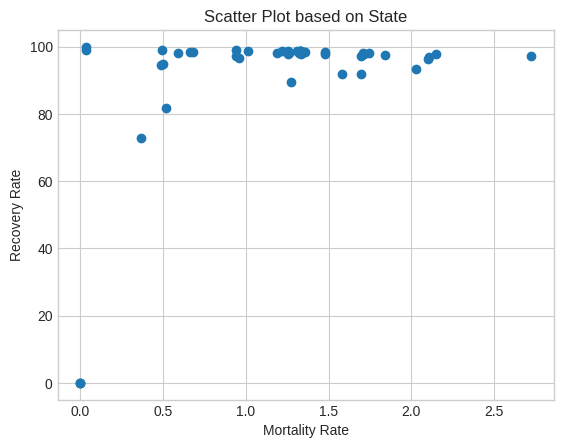

In [ ]:
plt.style.use('seaborn-whitegrid')

plt.scatter(statewise['Mortality Rate'], statewise['Recovery Rate'])
plt.xlabel('Mortality Rate')
plt.ylabel('Recovery Rate')
plt.title('Scatter Plot based on State')
plt.legend()

# Hiển thị biểu đồ
plt.show()

###### Comments

data between mortality rate and deaths rate are scattered

---> **Not Linear Regression**

####Top 10 states with most active cases in India

In [ ]:
# Top 10 active cases states

top_10_active_cases = pd.pivot_table(covid_df, values = ["Active_Cases", "Date"],
                           index = "State/UnionTerritory", aggfunc = max).sort_values(by =
                  ["Active_Cases"],
                  ascending = False).reset_index()

covid_df.groupby(by
                 = 'State/UnionTerritory').max()[['Active_Cases',
                                                  'Date']].sort_values(by =
                  ["Active_Cases"],
                  ascending = False).reset_index()

,State/UnionTerritory,Active_Cases,Date
0,Maharashtra,701614,2021-08-11
1,Karnataka,605515,2021-08-11
2,Kerala,445692,2021-08-11
3,Tamil Nadu,313048,2021-08-11
4,Uttar Pradesh,310783,2021-08-11
5,Rajasthan,212753,2021-08-11
6,Andhra Pradesh,211554,2021-08-11
7,Gujarat,148297,2021-08-11
8,West Bengal,132181,2021-08-11
9,Chhattisgarh,131245,2021-08-11


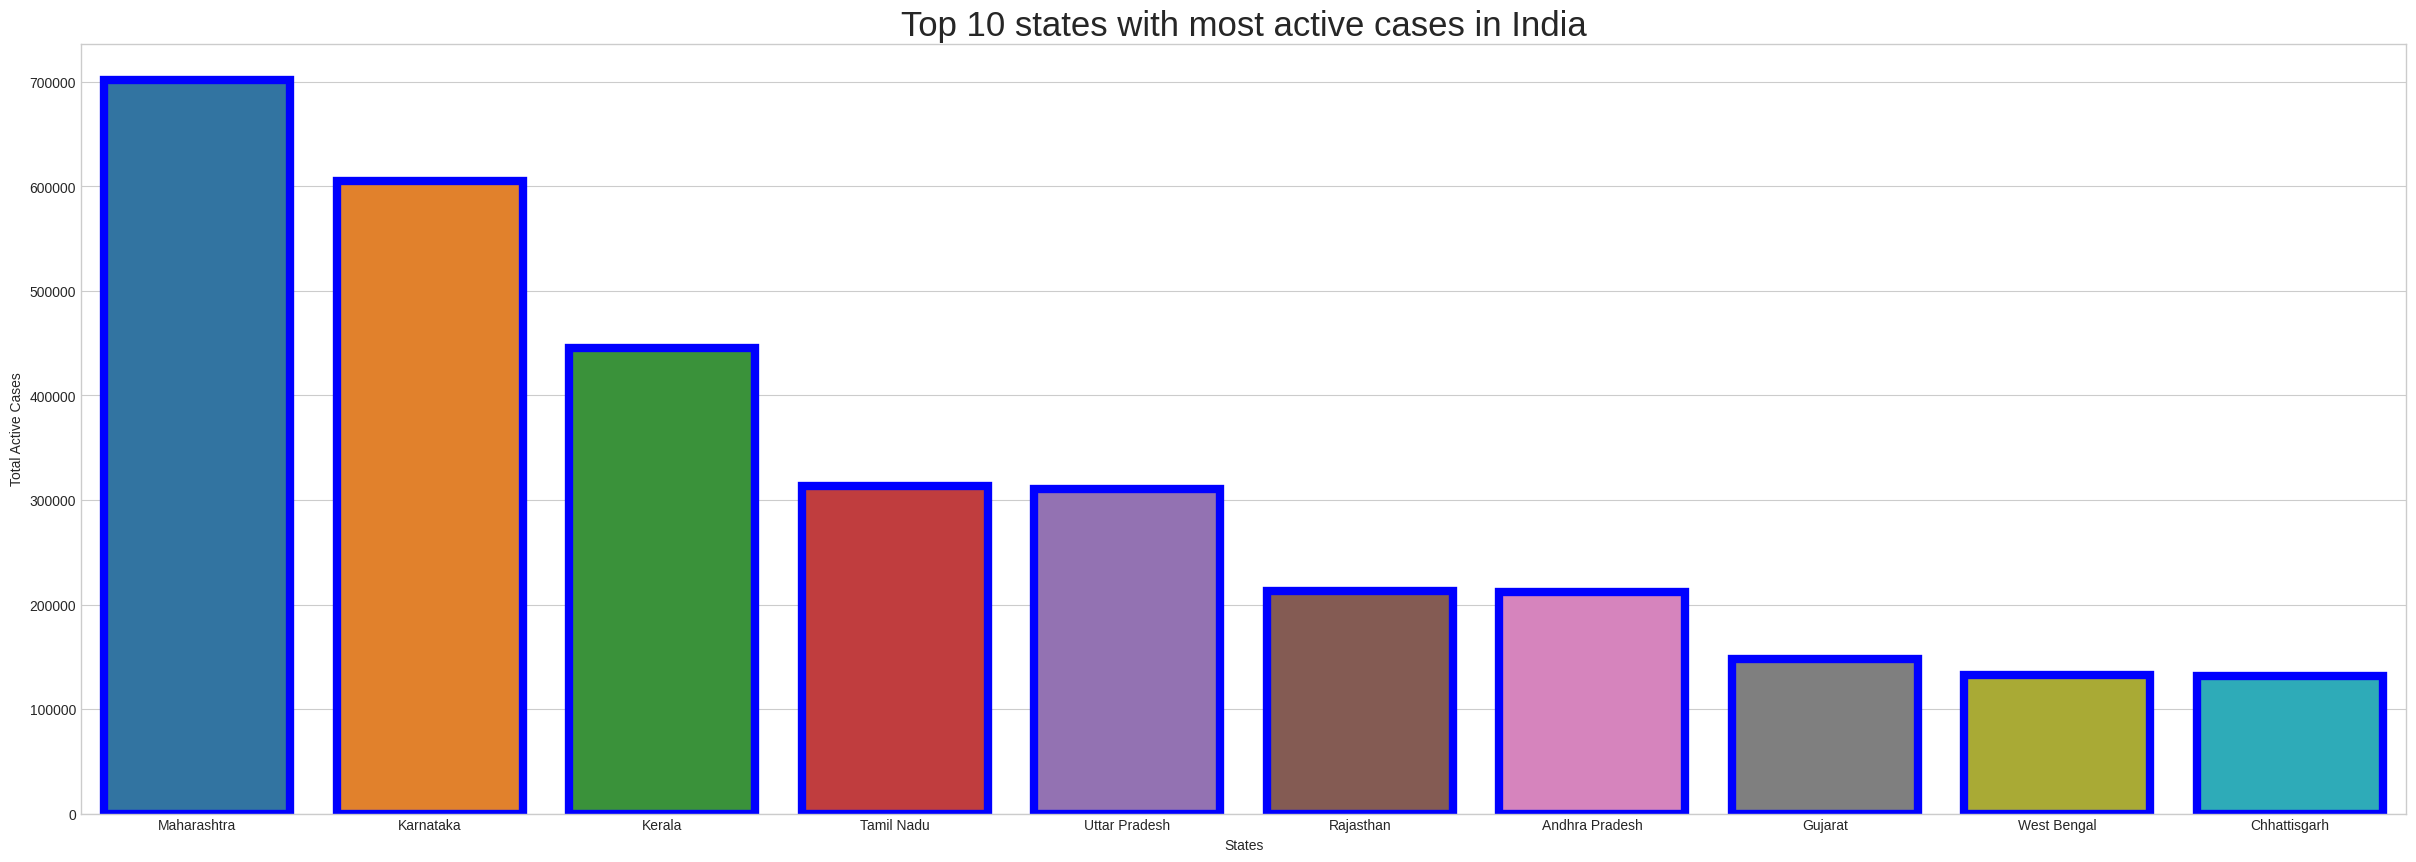

In [ ]:
fig = plt.figure(figsize=(30,10))
plt.title("Top 10 states with most active cases in India", size=25)
ax = sns.barplot(data = top_10_active_cases.iloc[:10], y = "Active_Cases",
                 x = "State/UnionTerritory", linewidth = 6,
                 edgecolor='blue', hue = "State/UnionTerritory")
plt.xlabel("States")
plt.ylabel("Total Active Cases")
plt.show()

The chart you provided shows “10 states with the highest number of cases in India”. It uses a bar chart to represent active cases in different states of India, allowing for quick visual comparisons between the numbers in those states.

**Here's a look at number of observations and insights based on chart:**

*   Maharashtra has the largest number of active cases, significantly more than other states, with the mark crossing 10,000
*   Karnataka came in second, with the number also crossing 10,000 but slightly lower than Maharashtra.
*  Kerala and Tamil Nadu came next, showing the states' large number of active cases as their bars times are close to 8,000 and 7,000 respectively.

---> The states of Uttar Pradesh and Rajasthan show moderate numbers of active cases, with their bars in the middle of the chart.
Bihar, Gujarat, West Bengal and Chhattisgarh do round the list with the fewest number of cases among the top 10, as illustrated by the shorter bars.

**Excerpt from chart:**


*  Southern states: Karnataka, Kerala and Tamil. Nadu is among the leading states
in terms of active cases.
*  Northern and Western states: Maharashtra and Gujarat in western India, as well as Uttar Pradesh and Rajasthan in the north, also There are significant numbers.

####Top states with higest deaths

In [ ]:
# Top states with the higgest deaths

top_10_deaths = covid_df.groupby(by =
                  'State/UnionTerritory').max()[['Deaths','Date']].sort_values(by =
                  ["Deaths"],
                  ascending = False).reset_index()

pd.pivot_table(covid_df, values = ["Deaths", "Date"],
                           index =
                  "State/UnionTerritory", aggfunc = max).sort_values(by =
                  ["Deaths"],
                  ascending = False).reset_index()

,State/UnionTerritory,Date,Deaths
0,Maharashtra,2021-08-11,134201
1,Maharashtra***,2021-07-21,130753
2,Karnataka,2021-08-11,36848
3,Karanataka,2021-07-20,36197
4,Tamil Nadu,2021-08-11,34367
5,Delhi,2021-08-11,25068
6,Uttar Pradesh,2021-08-11,22775
7,West Bengal,2021-08-11,18252
8,Kerala,2021-08-11,18004
9,Punjab,2021-08-11,16322


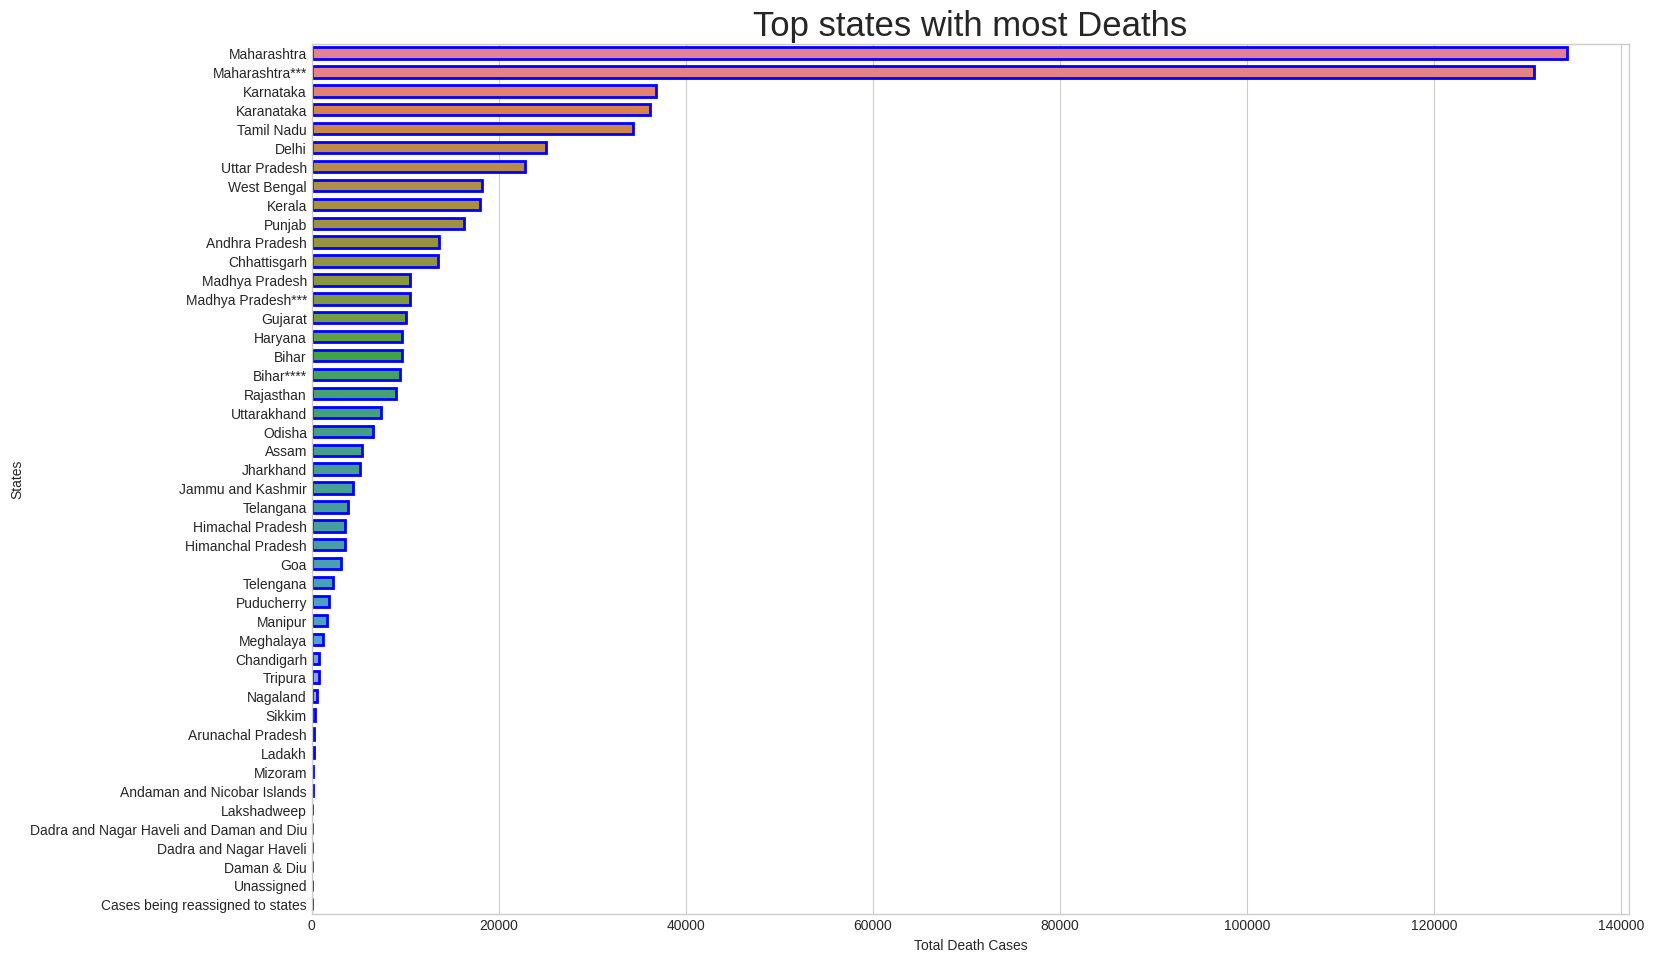

In [ ]:
fig = plt.figure(figsize=(17,15))
plt.title("Top states with most Deaths", size=25)
plt.subplots_adjust(bottom=0.3)  # Adjust bottom padding as needed
ax = sns.barplot(data = top_10_deaths, x = "Deaths", y = "State/UnionTerritory",
                 linewidth = 2, edgecolor = "blue", hue="State/UnionTerritory",
                 width = 0.6)
plt.ylabel("States")
plt.xlabel("Total Death Cases")
plt.show()

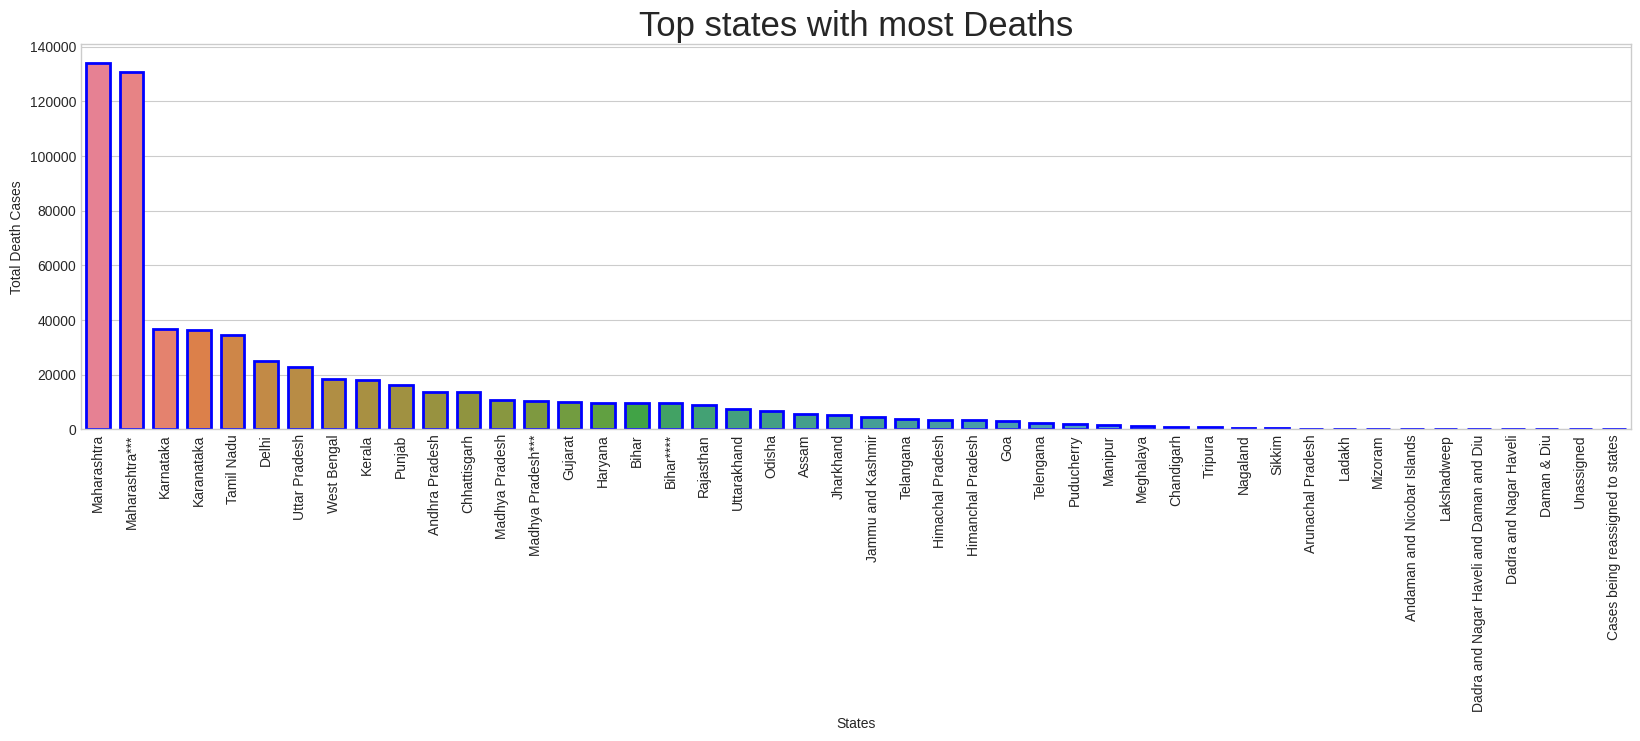

In [ ]:
fig = plt.figure(figsize=(20,5))
plt.title("Top states with most Deaths", size=25)
ax = sns.barplot(data = top_10_deaths, y = "Deaths", x = "State/UnionTerritory",
                 linewidth = 2, edgecolor = "blue", hue="State/UnionTerritory",
                 width = 0.7)
plt.xticks(rotation=90)
plt.xlabel("States")
plt.ylabel("Total Death Cases")
plt.show()

#####Comment

The bar chart you provided shows the "Top states with most Deaths" in descending order.

**Here are some key insights from the chart:**

* Highest Deaths: The state with the highest number of deaths is Maharasha, shown by the tallest blue bar, has significantly more deaths compared to others. This value exceeds 14,000.

* Sharp Decline: After the first few states, there is a notable sharp decline in the number of deaths. The second state, as represented by the next blue bar, has just over 10,000 deaths, and by the time you move to the third and fourth states, the numbers drop below 10,000. (from Maharasha to Karnataka)

* Gradual Decrease: Following the initial sharp drop, the decline in the number of deaths becomes more gradual among the subsequent states. This is indicated by the gradually shortening bars.

* Color Coding: The chart uses different colors (blue, orange, gray, yellow, green) for the bars. If color coding signifies a specific category or group, that information is not explicitly indicated in the view I have. A key or legend explaining the colors might be outside the visible chart area or absent.

* Multiple States with Low Death Counts: Many states, particularly towards the right end of the chart, show very low death counts as indicated by very short bars.

* Data Distribution: The concentration of deaths is heavily skewed towards a few states(Maharasha,  Karnataka and so on), with a long tail of many other states having considerably fewer deaths.

####Growth trend covid 19

In [ ]:
covid_df['State/UnionTerritory'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Lakshadweep', 'Telangana', 'Dadra and Nagar Haveli', 'Bihar****',
       'Madhya Pradesh***', 'Himanchal Pradesh', 'Karanataka',
       'Maharashtra***'], dtype=object)

In [ ]:
import pandas as pd

# Assuming you have your DataFrame 'covid_df'

growth_trend = covid_df[covid_df['State/UnionTerritory'].isin(['Maharashtra', 'Karnataka',
                                                "Kerala", "Tamil Nadu", "Uttar Pradesh"])]

growth_trend['Date'] = pd.to_datetime(growth_trend['Date'])

unique_dates_ym = growth_trend['Date'].dt.strftime('%Y-%m').unique()
print(unique_dates_ym)


['2020-01' '2020-02' '2020-03' '2020-04' '2020-05' '2020-06' '2020-07'
 '2020-08' '2020-09' '2020-10' '2020-11' '2020-12' '2021-01' '2021-02'
 '2021-03' '2021-04' '2021-05' '2021-06' '2021-07' '2021-08']


<ipython-input-43-e20c6b873536>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  growth_trend['Date'] = pd.to_datetime(growth_trend['Date'])


<ipython-input-44-a56da247da88>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  growth_trend['Date'] = pd.to_datetime(growth_trend['Date'])  # Convert to datetime


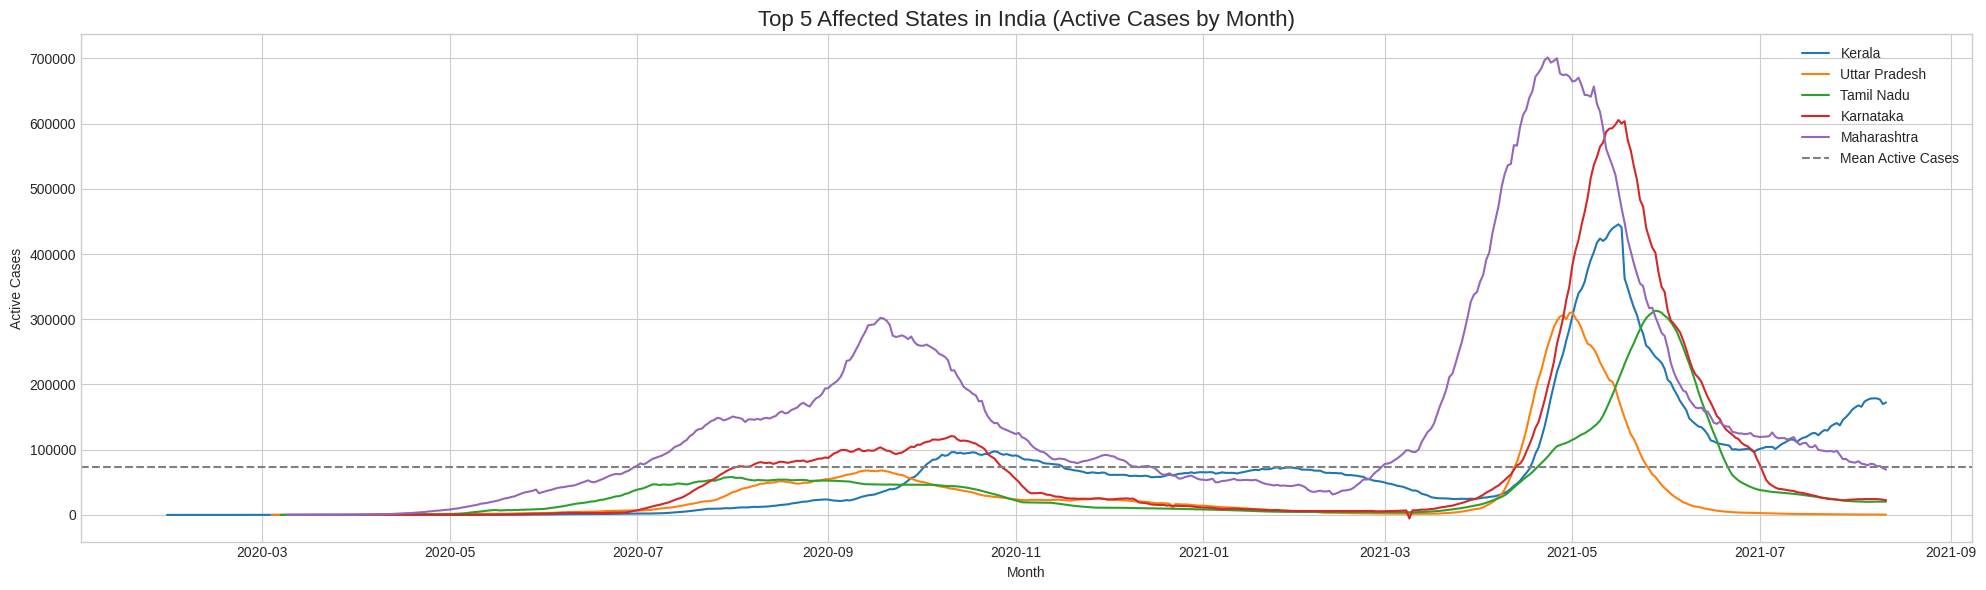

In [ ]:

fig, ax = plt.subplots(figsize=(20, 6))  # Create figure and axes

growth_trend['Date'] = pd.to_datetime(growth_trend['Date'])  # Convert to datetime

sns.lineplot(data=growth_trend, x='Date', y='Active_Cases', hue='State/UnionTerritory')  # Add markers for better data point visualization (optional)
plt.axhline(y = growth_trend['Active_Cases'].mean(), color = 'gray', linestyle = '--', label='Mean Active Cases')

plt.ylabel("Active Cases")
plt.xlabel("Month")
plt.title("Top 5 Affected States in India (Active Cases by Month)", size=16)
plt.legend()
plt.tight_layout()
plt.show()


#####Comment

This line chart illustrates the monthly trend in COVID-19 cases in the five worst-affected states in India.
* Blue line: Kerala - Kerala peaked around May 2021 with nearly 60,000 cases, a second smaller peak in August 2021 and a decline around 2022 with small ups and downs.

* Orange line: Tamil Nadu - Tamil Nadu peaked around May 2021 but had fewer cases than Kerala, about 35,000. Thereafter, the number of cases decreased significantly after this peak, remaining at a relatively low level compared to the initial peak.

* Gray line: Delhi – The number of cases in Delhi increased and decreased sharply. The peak was in May 2021, similar to Kerala but with about 28,000 cases. Subsequent peaks are lower and trending downward.

* Yellow line: Uttarakhand – Uttarakhand saw a sharp spike in May 2021, quickly surpassing 9,000 cases. After this peak, the number of cases decreased rapidly and remained low.

* Green line: Maharashtra - Maharashtra, represented by the green line, shows the large gap between the two main peaks : a peak around April 2021, just under 70,000 cases. and another in May with fewer than 40,000 cases. The decrease after May 2021 is very large, with a gradual decrease and a slight increase thereafter.

--> The general trend shows that the largest workload occurs in the first half of 2021, with high most obvious during this period. Following these peaks, each state showed varying degrees of decline in new cases, suggesting a reduction or control of the spread of COVID-19 over time.

###Vaccine

In [ ]:
vaccine_df = pd.read_csv("data/covid_vaccine_statewise.csv")

In [ ]:
vaccine_df.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [ ]:
 vaccine_df.describe()

,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
count,7.621000e+03,7.621000e+03,7621.000000,7.621000e+03,7.621000e+03,7.461000e+03,7.461000e+03,7461.000000,7.621000e+03,7.621000e+03,...,1.702000e+03,1.702000e+03,1.702000e+03,3.733000e+03,3.734000e+03,3.734000e+03,1.600000e+02,1.600000e+02,160.000000,5.919000e+03
mean,9.188171e+06,4.792358e+05,2282.872064,7.414415e+06,1.773755e+06,3.620156e+06,3.168416e+06,1162.978019,1.044669e+06,8.126553e+06,...,8.773958e+06,7.442161e+06,5.641605e+06,1.395895e+06,2.916515e+06,2.627444e+06,4.461687e+07,3.951018e+07,12370.543750,4.547842e+06
std,3.746180e+07,1.911511e+06,7275.973730,2.995209e+07,7.570382e+06,1.737938e+07,1.515310e+07,5931.353995,4.452259e+06,3.298414e+07,...,2.660829e+07,2.225999e+07,1.681650e+07,5.501454e+06,9.567607e+06,8.192225e+06,3.950749e+07,3.417684e+07,12485.026753,1.834182e+07
min,7.000000e+00,0.000000e+00,0.000000,7.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000,0.000000e+00,7.000000e+00,...,2.662400e+04,1.681500e+04,9.994000e+03,1.059000e+03,1.136000e+03,5.580000e+02,2.375700e+04,2.451700e+04,2.000000,7.000000e+00
25%,1.356570e+05,6.004000e+03,69.000000,1.166320e+05,1.283100e+04,5.655500e+04,5.210700e+04,8.000000,0.000000e+00,1.331340e+05,...,4.344842e+05,2.326275e+05,1.285605e+05,5.655400e+04,9.248225e+04,5.615975e+04,5.739350e+06,5.023407e+06,1278.750000,7.427550e+04
50%,8.182020e+05,4.547000e+04,597.000000,6.614590e+05,1.388180e+05,3.897850e+05,3.342380e+05,113.000000,1.185100e+04,7.567360e+05,...,3.095970e+06,2.695938e+06,1.805696e+06,2.947270e+05,8.330395e+05,7.887425e+05,3.716590e+07,3.365402e+07,8007.500000,4.022880e+05
75%,6.625243e+06,3.428690e+05,1708.000000,5.387805e+06,1.166434e+06,2.735777e+06,2.561513e+06,800.000000,7.579300e+05,6.007817e+06,...,7.366241e+06,6.969726e+06,5.294763e+06,9.105160e+05,2.499280e+06,2.337874e+06,7.441663e+07,6.685368e+07,19851.000000,3.501562e+06
max,5.132284e+08,3.501031e+07,73933.000000,4.001504e+08,1.130780e+08,2.701636e+08,2.395186e+08,98275.000000,6.236742e+07,4.468251e+08,...,2.243304e+08,1.667575e+08,1.186927e+08,9.224315e+07,9.096888e+07,6.731098e+07,1.349420e+08,1.156684e+08,46462.000000,2.506569e+08


In [ ]:
vaccine_df.rename(columns = {'Updated On': 'Vaccine_Date'}, inplace=True)

In [ ]:
vaccine_df.columns

Index(['Vaccine_Date', 'State', 'Total Doses Administered', 'Sessions',
       ' Sites ', 'First Dose Administered', 'Second Dose Administered',
       'Male (Doses Administered)', 'Female (Doses Administered)',
       'Transgender (Doses Administered)', ' Covaxin (Doses Administered)',
       'CoviShield (Doses Administered)', 'Sputnik V (Doses Administered)',
       'AEFI', '18-44 Years (Doses Administered)',
       '45-60 Years (Doses Administered)', '60+ Years (Doses Administered)',
       '18-44 Years(Individuals Vaccinated)',
       '45-60 Years(Individuals Vaccinated)',
       '60+ Years(Individuals Vaccinated)', 'Male(Individuals Vaccinated)',
       'Female(Individuals Vaccinated)', 'Transgender(Individuals Vaccinated)',
       'Total Individuals Vaccinated'],
      dtype='object')

In [ ]:
vaccine_df.head(10)

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0
5,21/01/2021,India,365965.0,32226.0,12600.0,365965.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,132784.0,233143.0,38.0,365965.0
6,22/01/2021,India,549381.0,36988.0,14115.0,549381.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,193899.0,355402.0,80.0,549381.0
7,23/01/2021,India,759008.0,43076.0,15605.0,759008.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,267856.0,491049.0,103.0,759008.0
8,24/01/2021,India,835058.0,49851.0,18111.0,835058.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,296283.0,538647.0,128.0,835058.0
9,25/01/2021,India,1277104.0,55151.0,19682.0,1277104.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,444137.0,832766.0,201.0,1277104.0


In [ ]:
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Vaccine_Date                         7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

In [ ]:
vaccine_df.isnull().sum()

Vaccine_Date                              0
State                                     0
Total Doses Administered                224
Sessions                                224
 Sites                                  224
First Dose Administered                 224
Second Dose Administered                224
Male (Doses Administered)               384
Female (Doses Administered)             384
Transgender (Doses Administered)        384
 Covaxin (Doses Administered)           224
CoviShield (Doses Administered)         224
Sputnik V (Doses Administered)         4850
AEFI                                   2407
18-44 Years (Doses Administered)       6143
45-60 Years (Doses Administered)       6143
60+ Years (Doses Administered)         6143
18-44 Years(Individuals Vaccinated)    4112
45-60 Years(Individuals Vaccinated)    4111
60+ Years(Individuals Vaccinated)      4111
Male(Individuals Vaccinated)           7685
Female(Individuals Vaccinated)         7685
Transgender(Individuals Vaccinat

In [ ]:
# Fill null
vaccine_df.fillna(0, inplace = True)

In [ ]:
vaccination = vaccine_df.drop(columns = [
                                         'AEFI', '18-44 Years (Doses Administered)',
                                         '45-60 Years (Doses Administered)',
                                         '60+ Years (Doses Administered)'], axis = 1)



##### Male vs Female vs Transgender vaccination

In [ ]:
import plotly.graph_objects as go

male = vaccination['Male(Individuals Vaccinated)'].sum()
female = vaccination['Female(Individuals Vaccinated)'].sum()
transgender = vaccination['Transgender(Individuals Vaccinated)'].sum()

labels = ['Male', 'Female', 'Transgender']
values = [male, female, transgender]

trace = go.Bar(
    x=labels,
    y=values,
    marker=dict(color=['blue', 'pink', 'purple'])
)

layout = go.Layout(
    title='Male, Female, and Transgender Vaccination',
    xaxis=dict(title='Gender'),
    yaxis=dict(title='Amounts')
)

# Tạo biểu đồ histogram
fig = go.Figure(data=[trace], layout=layout)
fig.show()

######Comment

The pie chart shows the distribution between "Male" and "Female" populations, provided in percentages.

* The red portion of the chart represents females and occupies 49% of the chart.

* The blue/purple portion represents males and occupies 51% of the chart.

--> This chart shows that the number of males is slightly higher than the number of females within the population being considered.

#### The Age Vaccination

In [ ]:
eighteen_to_forty_four = vaccination['18-44 Years(Individuals Vaccinated)'].sum()
forty_five_to_sixty = vaccination['45-60 Years(Individuals Vaccinated)'].sum()
sixty_plus = vaccination['60+ Years(Individuals Vaccinated)'].sum()

px.pie(names=['18-44 Years', '45-60 Years','60+ Years'],
       values = [eighteen_to_forty_four, forty_five_to_sixty, sixty_plus],
       title = 'The Age Vaccination')



###### Comments

The distribution of vaccinations by age is seen in this pie chart. The largest group, indicated by purple at 42%, consists of people who are 60 years of age or older. 45–60 year olds make up the second-largest category, which is represented by those in red at 37.8%. The vaccination rates for the 18–44 age range are shown in the smallest slice, which is green and represents 20.2%. The population under analysis's vaccination coverage across various age groups can be quickly compared thanks to this visual depiction.

####The type of vaccine

In [ ]:
# Male vs Female vaccination
covaxin = vaccine_df[' Covaxin (Doses Administered)'].sum()
coviShield = vaccine_df['CoviShield (Doses Administered)'].sum()
sputnik_V = vaccine_df['Sputnik V (Doses Administered)'].sum()

labels = ['Covaxin', 'CoviShield', 'Sputnik V']
values = [covaxin, coviShield, sputnik_V]

trace = go.Bar(
    x=labels,
    y=values,
    marker=dict(color=['blue', 'pink', 'purple'])
)

layout = go.Layout(
    title='The type of vaccine',
    xaxis=dict(title='Vaccine'),
    yaxis=dict(title='Amounts')
)

fig = go.Figure(data=[trace], layout=layout)
fig.show()

###### Comments

This bar chart shows the distribution of different vaccines administered. The bars represent the number of recipients for each vaccine.

The largest bar, shown in pink, corresponds to the "CovShield" vaccine, indicating it has been administered to the highest number of people.

In contrast, the blue bar represents the "Covaxin" vaccine, which appears to have been administered to a significantly lower number of people than CovShield.

"Sputnik V" vaccine accounts for such an insignificant amount that there are almost no bars on the chart

---> This visual presentation allows for quick comparison of the relative distribution and coverage of different vaccines in the analyzed population.

#### The vaccined programing based on State

In [ ]:
# Remove rows where states = India

vaccine = vaccine_df[vaccine_df.State != 'India']
vaccine

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,11/08/2021,West Bengal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7841,12/08/2021,West Bengal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7842,13/08/2021,West Bengal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7843,14/08/2021,West Bengal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
vaccine.rename(columns= {"Total Individuals Vaccinated":"Total"}, inplace=True)
vaccine

<ipython-input-64-676e102dcb26>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,11/08/2021,West Bengal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7841,12/08/2021,West Bengal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7842,13/08/2021,West Bengal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7843,14/08/2021,West Bengal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
vaccine_df

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,98111.0,153145.0,24.0,251280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,11/08/2021,West Bengal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7841,12/08/2021,West Bengal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7842,13/08/2021,West Bengal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7843,14/08/2021,West Bengal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
vaccine_df.columns

Index(['Vaccine_Date', 'State', 'Total Doses Administered', 'Sessions',
       ' Sites ', 'First Dose Administered', 'Second Dose Administered',
       'Male (Doses Administered)', 'Female (Doses Administered)',
       'Transgender (Doses Administered)', ' Covaxin (Doses Administered)',
       'CoviShield (Doses Administered)', 'Sputnik V (Doses Administered)',
       'AEFI', '18-44 Years (Doses Administered)',
       '45-60 Years (Doses Administered)', '60+ Years (Doses Administered)',
       '18-44 Years(Individuals Vaccinated)',
       '45-60 Years(Individuals Vaccinated)',
       '60+ Years(Individuals Vaccinated)', 'Male(Individuals Vaccinated)',
       'Female(Individuals Vaccinated)', 'Transgender(Individuals Vaccinated)',
       'Total Individuals Vaccinated'],
      dtype='object')

#### The Most Vaccinated States in India

In [ ]:
vaccinated_based_on_State = vaccine.groupby(by =
                'State').sum()['Total'].to_frame('Total').sort_values('Total',
                                                                      ascending = False)
vaccinated_based_on_State

,Total
State,
Maharashtra,1.403075e+09
Uttar Pradesh,1.200575e+09
Rajasthan,1.141163e+09
Gujarat,1.078261e+09
West Bengal,9.250227e+08
Karnataka,8.685235e+08
Madhya Pradesh,7.718640e+08
Bihar,6.608479e+08
Kerala,6.208252e+08


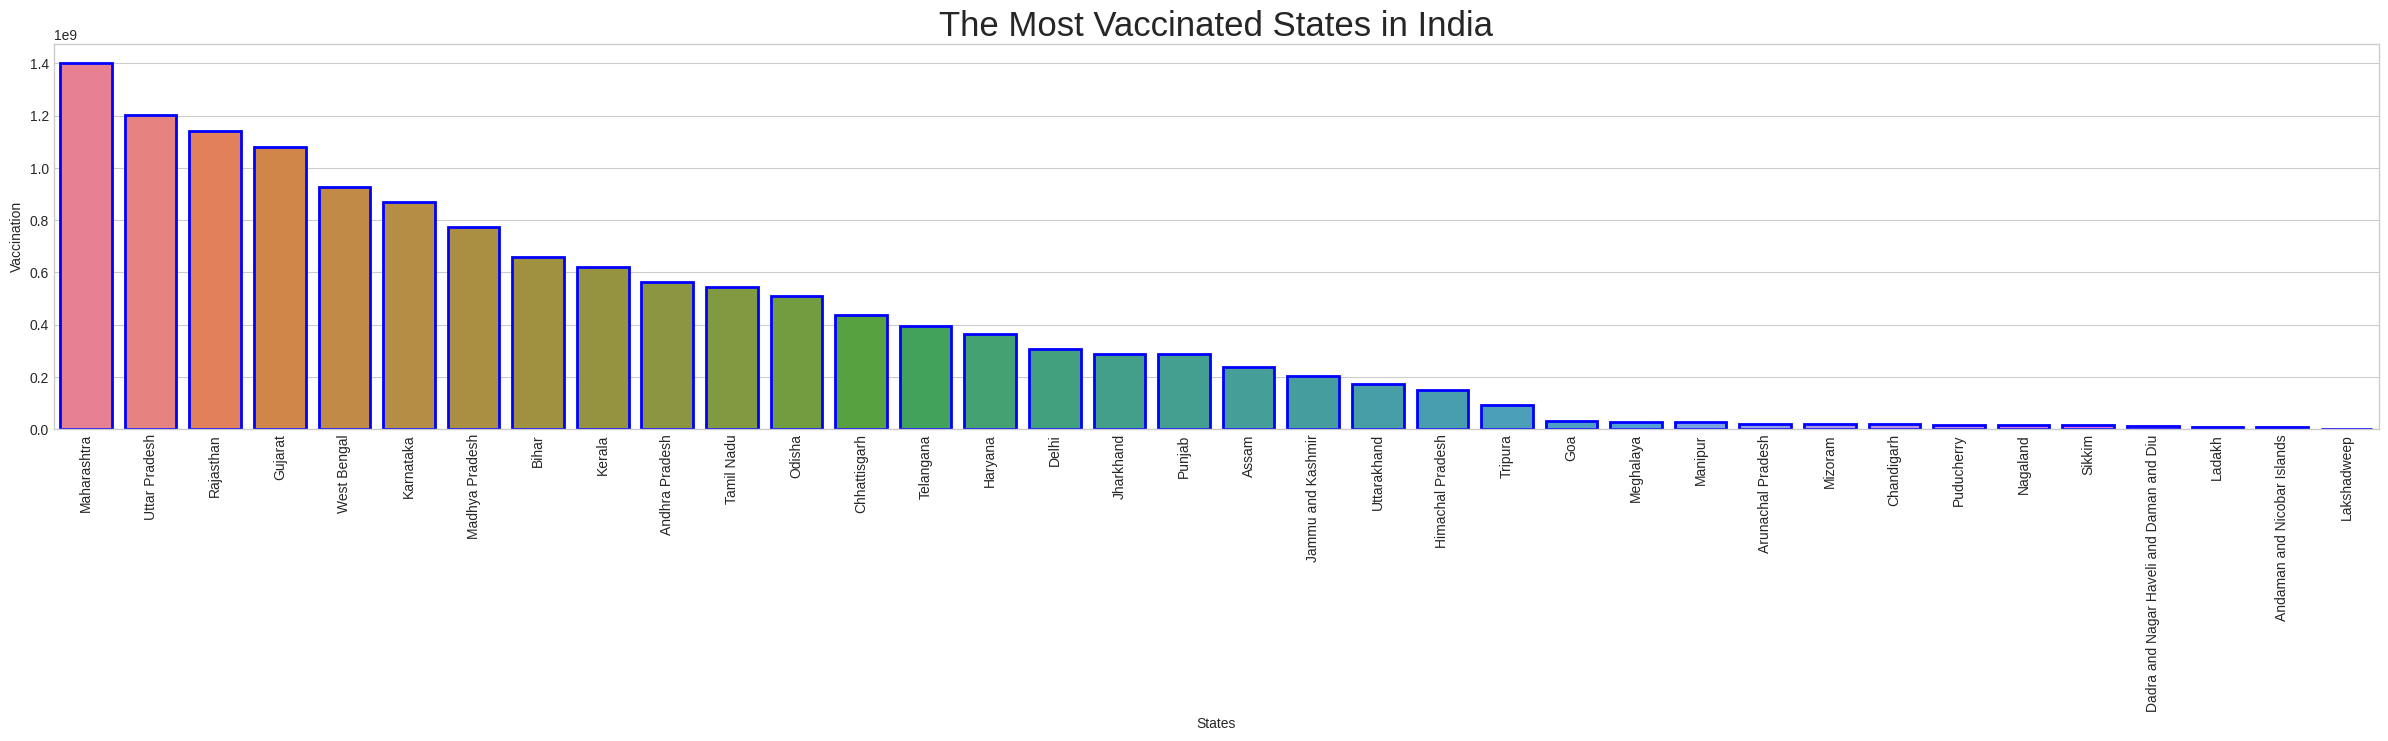

In [ ]:
fig = plt.figure(figsize=(30,5))
plt.title("The Most Vaccinated States in India", size=25)
ax = sns.barplot(data = vaccinated_based_on_State, x = vaccinated_based_on_State.index,
                 y = vaccinated_based_on_State.Total, linewidth = 2,
                 edgecolor='blue', hue = vaccinated_based_on_State.index)
# plt.xticks(rotation=90)
plt.xlabel("States")
plt.xticks(rotation = 90)
plt.ylabel("Vaccination")
plt.show()

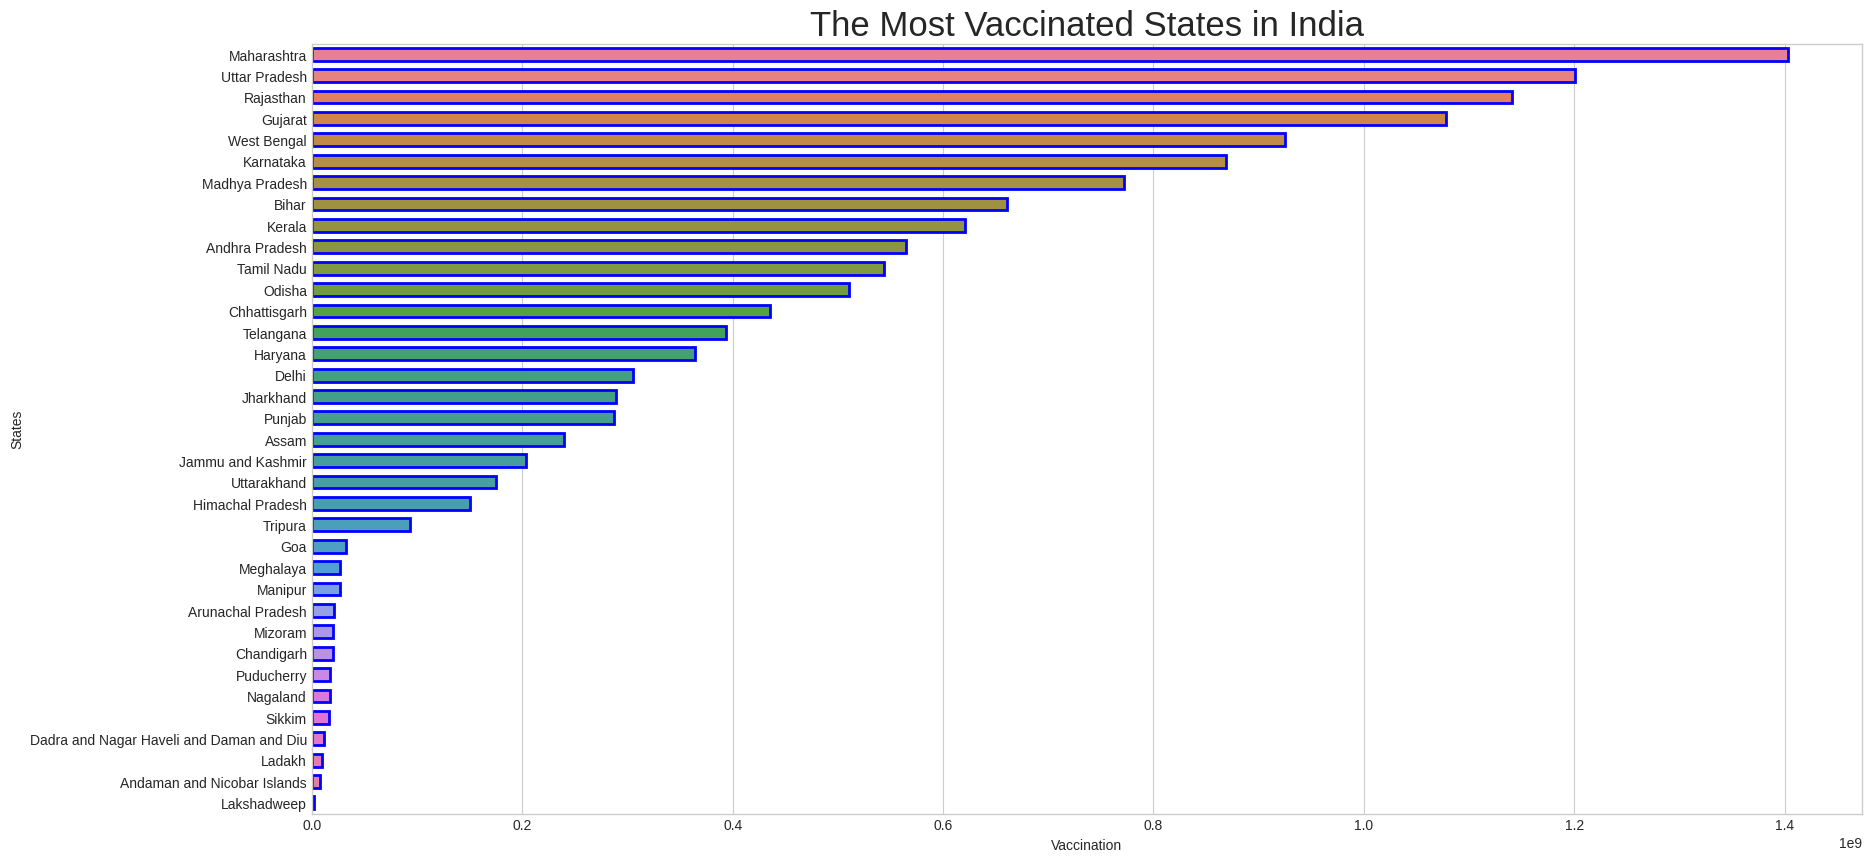

In [ ]:
fig = plt.figure(figsize=(20,10))
plt.title("The Most Vaccinated States in India", size=25)
ax = sns.barplot(data = vaccinated_based_on_State, y = vaccinated_based_on_State.index,
                 x = vaccinated_based_on_State.Total, linewidth = 2,
                 edgecolor='blue',width = 0.6, hue = vaccinated_based_on_State.index)
plt.ylabel("States")
plt.xlabel("Vaccination")
plt.show()

######Comment

This chart illustrates the states in India ranked by their vaccination numbers, from the highest to the lowest. The y-axis of the chart represents the number of vaccine doses administered, measured in billions, while the x-axis lists the various states in India.

**Here are some insights derived from the chart:**

* Top Vaccinated States: The state with the highest vaccination number has a count close to 3 billion doses, substantially ahead of the others. The next few states also show significant vaccination numbers, each dropping slightly from the previous state.

* Color Gradient Representation: The colors on the bars transition from red to purple as you move from the highest vaccinated states to the least. Reds and oranges typically signify higher values, while colors shifting to greens and purples indicate lower values. This color gradient assists in visual differentiation of the vaccination levels across states.

* Vaccination Spread: There is a noticeable decrease in vaccination numbers as you move from the left to the right of the chart. The states on the left side of the chart show a robust vaccination performance, whereas those towards the right have considerably lower numbers.

* Distribution Analysis: The chart suggests that a few states are leading in terms of vaccination efforts, while many states are far behind, indicating a wide variance in vaccine distribution and administration across different regions of India.

#### Describe AEFI
**AEFI is AEFI (Adverse Events Following Immunization) data in the literature that shows the number of adverse events following vaccination (problems after vaccination). AEFI says something about frequency and safety of COVID-19 vaccination**

In [ ]:
import plotly.graph_objects as go

bins = int(np.ceil(1 + np.log2(len(vaccine_df.AEFI))))

trace = go.Histogram(
    x=vaccine_df['AEFI'],
    nbinsx=bins
)

layout = go.Layout(
    title='The frequency of AEFI',
    xaxis=dict(title='Values'),
    yaxis=dict(title='Frequency')
)

# Tạo biểu đồ histogram
fig = go.Figure(data=[trace], layout=layout)
fig.show()

##### Comment

This bar chart displays the frequency or number of safe cases after vaccination on the vertical axis. The graph shows a single prominent blue bar extending to about 6,800 on the frequency scale.

The majority of AEFI-related observations or events are concentrated within the range indicated by this high bar. This shows that AEFI events or incidents occur most frequently in this specific frequency range.

--> The high risk of an incident occurring after counting is very low, ranging from 0 - under 5k

#### The correlation between Total Dose Administered and Second Dose Administered

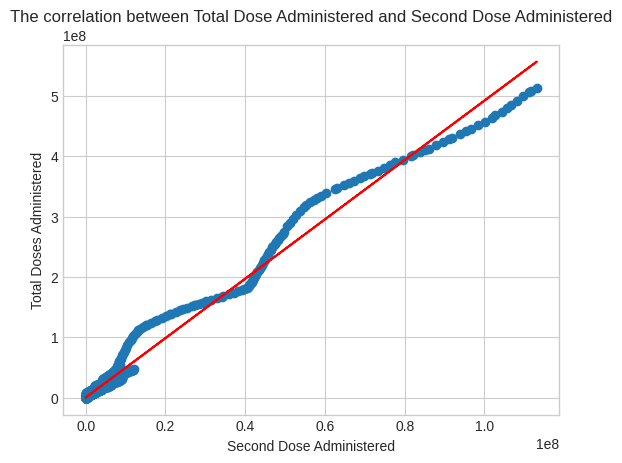

In [ ]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(20,10))

coefficients = np.polyfit(vaccine_df['Second Dose Administered'], vaccine_df['Total Doses Administered'], 1)
slope = coefficients[0]
intercept = coefficients[1]
regression_line = [slope * i + intercept for i in vaccine_df['Second Dose Administered']]
plt.scatter(vaccine_df['Second Dose Administered'], vaccine_df['Total Doses Administered'])

plt.plot(vaccine_df['Second Dose Administered'], regression_line, color='red')

plt.xlabel('Second Dose Administered')
plt.ylabel('Total Doses Administered')
plt.title('The correlation between Total Dose Administered and Second Dose Administered')
plt.legend()

# Hiển thị biểu đồ
plt.show()

##### Comment

The scatter chart suggests that initially, when the percentage of second doses administered was low, the total number of doses administered was also relatively low. However, as the vaccination program progressed and the percentage of individuals receiving their second dose increased, the total number of doses administered also increased significantly, as evident from the steep upward trend in both lines.

This positive correlation indicates that a higher uptake of second doses is associated with a larger overall number of doses being administered within the population, which is crucial for achieving complete vaccination coverage.

**--> Linear Regression**

In [ ]:
print('Model is y = '+ str(slope)+'x + '+ str(intercept))

Model is y = 4.917205770375862x + 452938.0571869854


###### Model

In [ ]:
sm.OLS(vaccine_df['Second Dose Administered'], vaccine_df['Total Doses Administered']).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Second Dose Administered   R-squared (uncentered):                   0.988
Model:                                  OLS   Adj. R-squared (uncentered):              0.988
Method:                       Least Squares   F-statistic:                          6.364e+05
Date:                      Sun, 12 May 2024   Prob (F-statistic):                        0.00
Time:                              02:19:08   Log-Likelihood:                     -1.1820e+05
No. Observations:                      7845   AIC:                                  2.364e+05
Df Residuals:                          7844   BIC:                                  2.364e+05
Df Model:                                 1                                                  
Covariance Type:                  nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Total Doses Administered     0.2003      0.000    797.737      0.000       0.200       0.201
==============================================================================
Omnibus:                     4467.744   Durbin-Watson:                   0.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1363645.644
Skew:                          -1.526   Prob(JB):                         0.00
Kurtosis:                      67.517   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the recovered OLS results, we can see that the R-squared has a value of 0.988. This shows that approximately 98.8% of the variance in the dependent variable (Second dose administered) can be accounted for by the independent variable (Total dose administered) in the model.

The closer the R-squared value is to 1, the higher the recovery model is able to resolve a large portion of the variation in the dependent variable. In this case, the R-squared has a value of 0.988, which selected a linear feature recovery model capable of addressing a large portion of the variation in the dependent variable (Second dose administered) based on the independent variable. (Total number of doses administered).

The coefficient of the variable Total dose is 0.2003, with a skewness of 0.000. This indicates that each unit increase in the Total Dose variable corresponds to a unit increase in the Second Dose Administered variable.

The F statistic value is 6.364e+05, with a validation value of 0.00, indicating that the linear relationship between Total Dose and Second Dose administered is statistically significant. This supports the conclusion of a strong linear relationship between the two variables.

Overall, OLS recovery results found a strong linear relationship between Total Dose and Second Dose Administered. However, autocorrelation, significant departures from the normal distribution, variance, and data justification should be considered when analyzing the results.

#### The correlation between Total Dose Administered and First Dose Administered

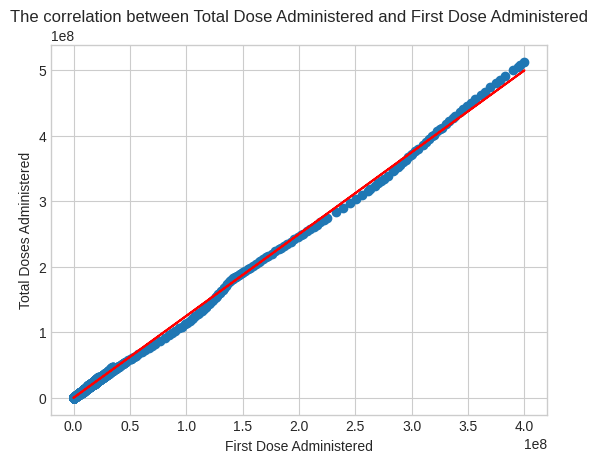

In [ ]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(20,10))

coefficients = np.polyfit(vaccine_df['First Dose Administered'], vaccine_df['Total Doses Administered'], 1)
slope = coefficients[0]
intercept = coefficients[1]
regression_line = [slope * i + intercept for i in vaccine_df['First Dose Administered']]
plt.scatter(vaccine_df['First Dose Administered'], vaccine_df['Total Doses Administered'])

plt.plot(vaccine_df['First Dose Administered'], regression_line, color='red')

plt.xlabel('First Dose Administered')
plt.ylabel('Total Doses Administered')
plt.title('The correlation between Total Dose Administered and First Dose Administered')
plt.legend()

# Hiển thị biểu đồ
plt.show()

##### Comment


The chart suggests that as the vaccination program progressed and more individuals received their first dose, the total number of doses administered (which includes both first and second doses) also increased linearly. This positive correlation implies that the administration of first doses directly contributes to the overall increase in the total number of doses administered within the population.

**--> Linear Regression**

In [ ]:
print('Model is y = '+ str(slope)+'x + '+ str(intercept))

Model is y = 1.2501951159482352x + -78974.01098671698


###### Model

In [ ]:
sm.OLS(vaccine_df['First Dose Administered'], vaccine_df['Total Doses Administered']).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     First Dose Administered   R-squared (uncentered):                   0.999
Model:                                 OLS   Adj. R-squared (uncentered):              0.999
Method:                      Least Squares   F-statistic:                          1.014e+07
Date:                     Sun, 12 May 2024   Prob (F-statistic):                        0.00
Time:                             02:19:09   Log-Likelihood:                     -1.1820e+05
No. Observations:                     7845   AIC:                                  2.364e+05
Df Residuals:                         7844   BIC:                                  2.364e+05
Df Model:                                1                                                  
Covariance Type:                 nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Total Doses Administered     0.7997      0.000   3183.985      0.000       0.799       0.800
==============================================================================
Omnibus:                     4467.744   Durbin-Watson:                   0.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1363645.644
Skew:                           1.526   Prob(JB):                         0.00
Kurtosis:                      67.517   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the recovered OLS results, the R-squared has a value of 0.999. This shows that approximately 99.9% of the variance in the dependent variable (First dose administered) can be accounted for by the independent variable (Total dose administered) in the model.

The closer the R-squared value is to 1, the higher the recovery model is able to resolve a large portion of the variation in the dependent variable. In this case, the R-squared has a value of 0.999, which is chosen as a linear feature recovery model capable of resolving a large portion of the variation in the dependent variable (First Dose Management) based on the independent variable ( Total number of doses administered).

The coefficient of the variable Total dose is 0.7997, with a deviation of 0.000. This indicates that each unit increase in the Total Dose variable corresponds to a unit increase in the First Dose Administered variable.

The F-statistic value is 1.014e+07, with a validation value of 0.00, indicating that the linear relationship between Total Dose and First Dose is statistically significant. This supports the conclusion of a strong linear relationship between the two variables.

Overall, OLS recovery results found a strong linear relationship between Total Dose and First Dose. However, autocorrelation, significant departures from the normal distribution, variance, and data justification should be considered when analyzing the results.

#### The correlation between AEFI and Total Doses Administered


In [ ]:
vaccine_df['Total Doses Administered'].corr(vaccine_df['AEFI'])

0.9124525009869163

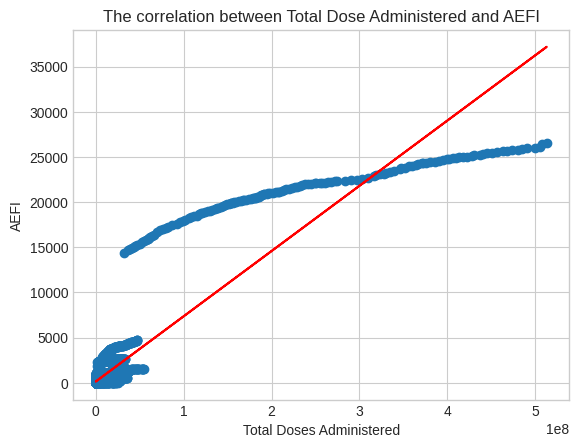

In [ ]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(20,10))

coefficients = np.polyfit(vaccine_df['Total Doses Administered'], vaccine_df['AEFI'], 1)
slope = coefficients[0]
intercept = coefficients[1]
regression_line = [slope * i + intercept for i in vaccine_df['Total Doses Administered']]
plt.scatter(vaccine_df['Total Doses Administered'], vaccine_df['AEFI'])

plt.plot(vaccine_df['Total Doses Administered'], regression_line, color='red')

plt.xlabel('Total Doses Administered')
plt.ylabel('AEFI')
plt.title('The correlation between Total Dose Administered and AEFI')
plt.legend()

# Hiển thị biểu đồ
plt.show()

###### Comment

**---> Linear Regression**

In [ ]:
print('Model is y = '+ str(slope)+'x + '+ str(intercept))

Model is y = 7.219056258515374e-05x + 145.45159865581834


In [ ]:
vaccine_df['First Dose Administered'].corr(vaccine_df['Second Dose Administered'])

0.989982702834893

#### The correlation between Second Dose Administered and First Dose Administered



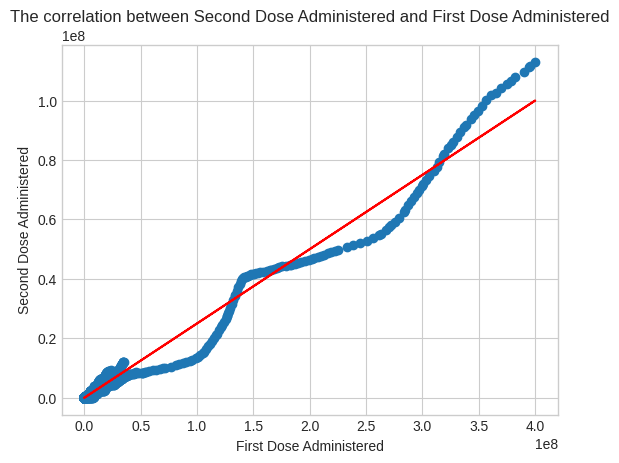

In [ ]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(20,10))

coefficients = np.polyfit(vaccine_df['First Dose Administered'], vaccine_df['Second Dose Administered'], 1)
slope = coefficients[0]
intercept = coefficients[1]
regression_line = [slope * i + intercept for i in vaccine_df['First Dose Administered']]
plt.scatter(vaccine_df['First Dose Administered'], vaccine_df['Second Dose Administered'])

plt.plot(vaccine_df['First Dose Administered'], regression_line, color='red')

plt.xlabel('First Dose Administered')
plt.ylabel('Second Dose Administered')
plt.title('The correlation between Second Dose Administered and First Dose Administered')
plt.legend()

# Hiển thị biểu đồ
plt.show()

##### Model

In [ ]:
sm.OLS(vaccine_df['First Dose Administered'], vaccine_df['Second Dose Administered']).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     First Dose Administered   R-squared (uncentered):                   0.981
Model:                                 OLS   Adj. R-squared (uncentered):              0.981
Method:                      Least Squares   F-statistic:                          4.044e+05
Date:                     Sun, 12 May 2024   Prob (F-statistic):                        0.00
Time:                             02:19:10   Log-Likelihood:                     -1.3076e+05
No. Observations:                     7845   AIC:                                  2.615e+05
Df Residuals:                         7844   BIC:                                  2.615e+05
Df Model:                                1                                                  
Covariance Type:                 nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Second Dose Administered     3.9305      0.006    635.941      0.000       3.918       3.943
==============================================================================
Omnibus:                     6687.384   Durbin-Watson:                   0.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1287733.942
Skew:                           3.337   Prob(JB):                         0.00
Kurtosis:                      65.410   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the recovered OLS results, the R-squared has a value of 0.981. This found approximately 98.1% of the variance in the dependent variable (First Dose) could be accounted for by the independent variable (Second Dose) in the model.

The closer the R-squared value is to 1, the higher the recovery model is able to resolve a large portion of the variation in the dependent variable. In this case, the R-squared has a value of 0.981, which selected a linear feature recovery model capable of resolving a large portion of the variation in the dependent variable (First dose administered) based on the independent variable. (Second dose administered).

The coefficient of the variable Second dose used is 3.9305, with a skewness of 0.006. This indicates that each unit increase in the Second Dose Administered variable corresponds to a unit increase in the First Dose Administered variable.

The F-statistic value was 4.044e+05, with a validation value of 0.00, indicating that the linear relationship between Second Dose Administered and First Dose Administered was statistically significant. This supports the conclusion of a strong linear relationship between the two variables.

Overall, OLS recovery results found a strong linear relationship between Second Dose Administered and First Dose Administered. However, autocorrelation, significant departures from the normal distribution, variance, and data justification should be considered when analyzing the results.

In [ ]:
total_sample_state = testing_details.groupby(by =
                                             'State').sum()['TotalSamples'].to_frame('TotalSamples').sort_values(by =
                                                                                                                 "TotalSamples",
                                                                                                                 ascending = False)
total_sample_state

,TotalSamples
State,
Uttar Pradesh,1.138818e+10
Bihar,7.392796e+09
Maharashtra,7.334574e+09
Karnataka,6.773248e+09
Tamil Nadu,6.711189e+09
Andhra Pradesh,4.967773e+09
Gujarat,4.623914e+09
Delhi,4.310596e+09
Kerala,4.269006e+09


In [ ]:
fig = px.bar(testing_details,x="TotalSamples", y="State", orientation='h')
fig.update_xaxes(tickfont=dict(color='black', size=14))
fig.update_yaxes(tickfont=dict(color='black', size=14))
fig.update_layout(
    title_text='<b>Number of Samples Tested <b>',
    title_x=0.5,
    autosize=False,
    width= 1100,
    height= 1000)
fig.update_traces(marker_color='red')
fig.show()

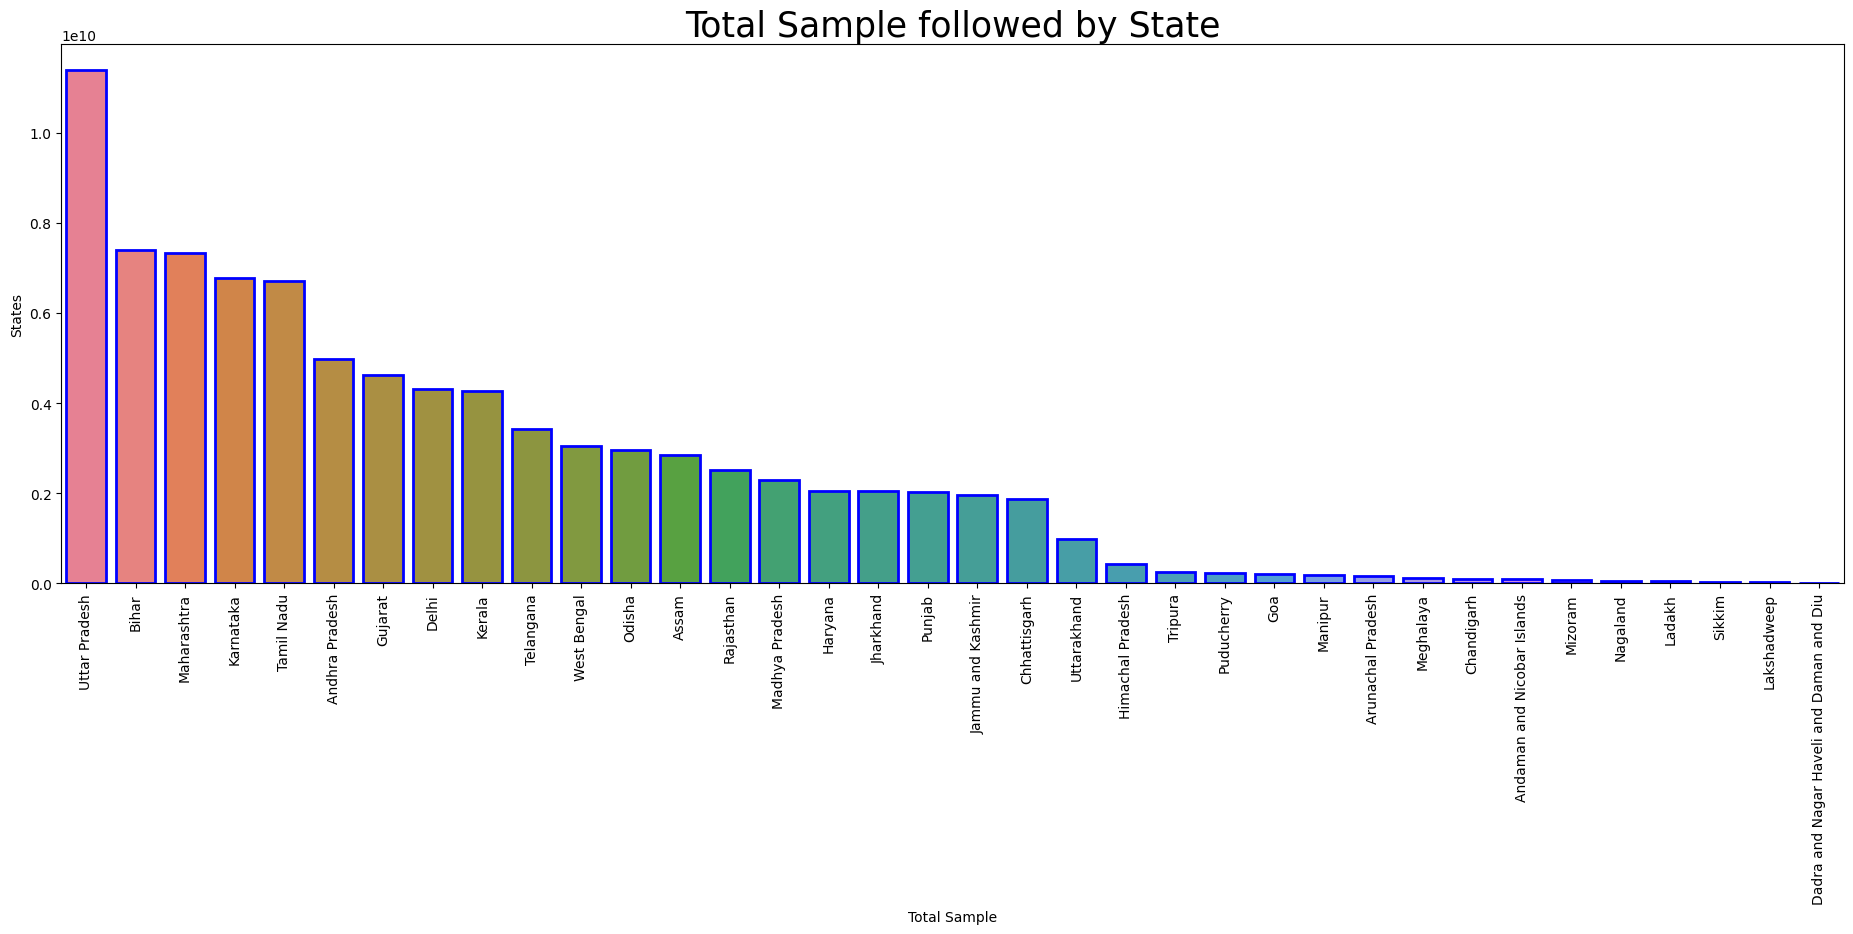

In [ ]:
fig = plt.figure(figsize=(23,7))
plt.title("Total Sample followed by State", size=25)
ax = sns.barplot(data = total_sample_state, x = total_sample_state.index,
                 y = total_sample_state.TotalSamples, linewidth = 2,
                 edgecolor='blue', hue = total_sample_state.index)
plt.xticks(rotation=90)
plt.xlabel("Total Sample")
plt.ylabel("States")
plt.show()

###### Comment

This bar chart displays the total number of samples tested for COVID-19 or number of observations followed across different states or regions.

The chart reveals a significant variation in the total sample size across the different states. A few states, such as Uttar Pradesh, Bihar, Maharashtra, and Karnataka, have substantially larger sample sizes compared to the rest, as indicated by the taller bars.

This type of visualization can be useful for quickly identifying regions or states that may require additional sampling efforts or further investigation, as well as those that have already been adequately sampled or studied.

Overall, the chart effectively communicates the relative differences in otal number of  tested for COVID-19 across various states or regions, allowing for a high-level comparison and potential identification of outliers or areas of focus.


#### Total number of samples collected for Covid-19 testing(Statewise) followed Time

In [ ]:
testing_details.Date = pd.to_datetime(testing_details.Date, format="%Y-%m-%d")
fig = px.line(testing_details, x='Date', y='TotalSamples', color='State', title='Total number of samples collected for Covid-19 testing(Statewise) followed Time' , template="plotly_dark")

fig.show()

#### The continuous postive infections

In [ ]:
continous_positive = testing_details[testing_details.Positive.notnull()]

In [ ]:
start_day = continous_positive.groupby(by = 'State')['Date'].min()
end_day = continous_positive.groupby(by = 'State')['Date'].max()


In [ ]:
the_continous_positive_infections = pd.merge(start_day, end_day, on = 'State')
the_continous_positive_infections.columns = ['Start Day', 'End Day']
the_continous_positive_infections

,Start Day,End Day
State,,
Andaman and Nicobar Islands,2020-04-17,2021-07-19
Andhra Pradesh,2020-04-02,2020-08-10
Arunachal Pradesh,2020-04-09,2020-08-15
Assam,2020-04-02,2020-08-21
Bihar,2020-04-05,2020-08-12
Chandigarh,2020-04-02,2020-08-18
Chhattisgarh,2020-04-02,2020-08-21
Dadra and Nagar Haveli and Daman and Diu,2020-04-09,2020-10-20
Delhi,2020-04-07,2020-08-15


In [ ]:
the_continous_positive_infections['Start Day'] = pd.to_datetime(the_continous_positive_infections['Start Day'])
the_continous_positive_infections['End Day'] = pd.to_datetime(the_continous_positive_infections['End Day'])

Text(0.5, 1.0, 'Continuous Positive Infections Timeline by State')

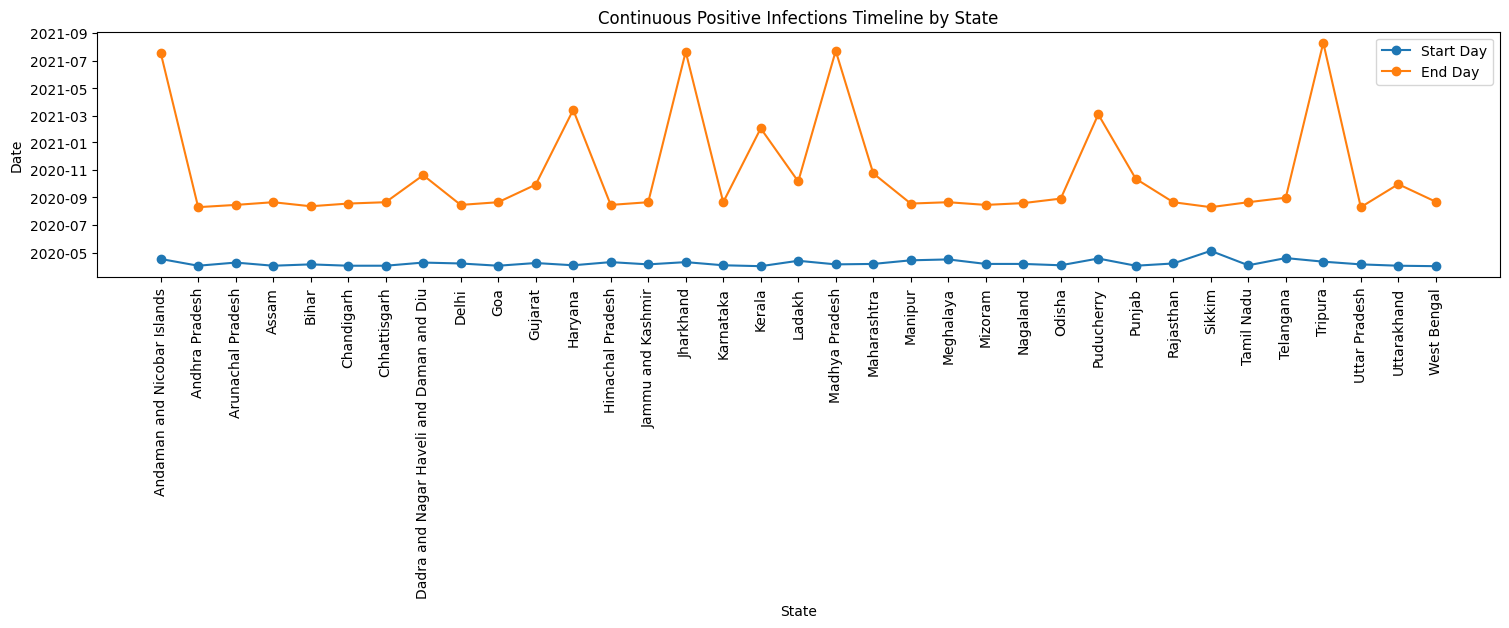

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(the_continous_positive_infections.index, the_continous_positive_infections['Start Day'], marker='o', label='Start Day')
plt.plot(the_continous_positive_infections.index, the_continous_positive_infections['End Day'], marker='o', label='End Day')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.xlabel('State')
plt.ylabel('Date')
plt.title("Total number of samples collected for Covid-19 testing(Statewise) followed Time")

##### Comment

Timeline showing the number of consecutive days of COVID-19 infections, represented by two vertical lines (blue and orange) for each state in India, between September 2020 and September 2021 The horizontal axis represents the states of India, arranged alphabetically. The vertical axis represents time.

**Trend**

*The chart shows some of the following general trends:*

  * There are significant differences in the number of days of continuous COVID-19 infection between states. Some states, such as Kerala, Maharashtra and Tamil Nadu, have had significantly higher number of consecutive COVID-19 infection days than other states, such as Arunachal Pradesh, Himachal Pradesh and Mizoram.

  * There is some evidence of seasonality in the number of consecutive days of COVID-19 infection. The number of consecutive days of COVID-19 infection tends to increase in winter and decrease in summer.

**Conclude:**

The timeline shows some general trends in the number of consecutive days of COVID-19 infections in India. The number of consecutive days of COVID-19 infection tends to decrease over time, but there are significant differences between states. There is some evidence of seasonality in the number of consecutive days of COVID-19 infection.

#### The proportion of negative and positive case based on States

In [ ]:
# convert to negative to float64
testing_details['Negative'] = pd.to_numeric(testing_details['Negative'], errors='coerce')

# Convert the column to float
testing_details['Negative'] = testing_details['Negative'].astype('float64')

In [ ]:
# total negative and positive based on State
grouped_data = testing_details.groupby(by = 'State')[['Negative','Positive']].sum()

grouped_data.head()

,Negative,Positive
State,,
Andaman and Nicobar Islands,1.210000e+03,1763591.0
Andhra Pradesh,3.991600e+09,3859260.0
Arunachal Pradesh,1.156258e+08,51245.0
Assam,2.163110e+06,2065991.0
Bihar,2.299000e+03,1859345.0


In [ ]:
import numpy as np

grouped_data['Negative'].fillna(0, inplace=True)
grouped_data['Positive'].fillna(0, inplace=True)

grouped_data['Negative_Percentage'] = (grouped_data['Negative'] /
                                      (grouped_data['Negative'] +
                                       grouped_data['Positive'])) * 100
grouped_data['Positive_Percentage'] = (grouped_data['Positive'] /
                                      (grouped_data['Negative'] +
                                       grouped_data['Positive'])) * 100

grouped_data['Negative_Percentage'] = grouped_data['Negative_Percentage'].apply(lambda x: str(round(x, 2)) + '%')
grouped_data['Positive_Percentage'] = grouped_data['Positive_Percentage'].apply(lambda x: str(round(x, 2)) + '%')

grouped_data.head()

,Negative,Positive,Negative_Percentage,Positive_Percentage
State,,,,
Andaman and Nicobar Islands,1.210000e+03,1763591.0,0.07%,99.93%
Andhra Pradesh,3.991600e+09,3859260.0,99.9%,0.1%
Arunachal Pradesh,1.156258e+08,51245.0,99.96%,0.04%
Assam,2.163110e+06,2065991.0,51.15%,48.85%
Bihar,2.299000e+03,1859345.0,0.12%,99.88%


In [ ]:
grouped_data[['Negative_Percentage','Positive_Percentage']]

,Negative_Percentage,Positive_Percentage
State,,
Andaman and Nicobar Islands,0.07%,99.93%
Andhra Pradesh,99.9%,0.1%
Arunachal Pradesh,99.96%,0.04%
Assam,51.15%,48.85%
Bihar,0.12%,99.88%
Chandigarh,99.93%,0.07%
Chhattisgarh,85.24%,14.76%
Dadra and Nagar Haveli and Daman and Diu,97.28%,2.72%
Delhi,6.08%,93.92%


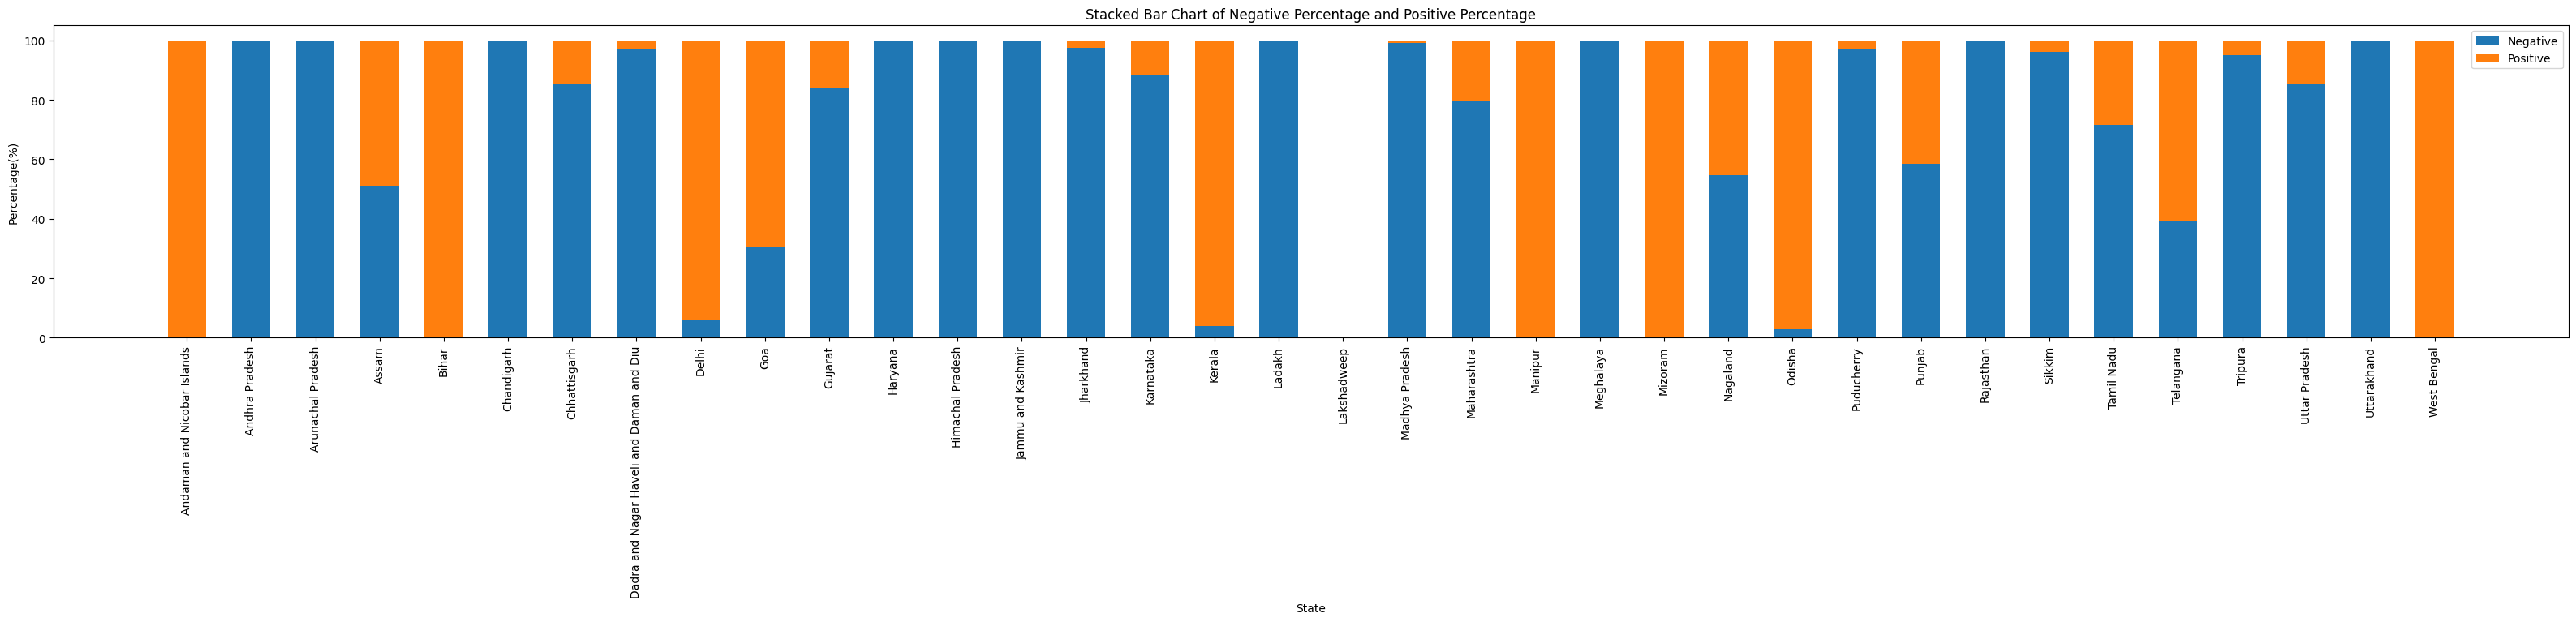

In [ ]:
plt.figure(figsize=(40, 5))

states = grouped_data.index.tolist()

x = range(len(states))

bottom = np.zeros(len(states))
for col in ['Negative_Percentage', 'Positive_Percentage']:
    # Loại bỏ ký tự '%' trước khi chuyển đổi thành số
    column_data = grouped_data[col].str.replace('%', '').astype(float)
    plt.bar(x, column_data, bottom=bottom, label=col.split('_')[0],
            width = 0.6)
    bottom += column_data

plt.xlabel('State')
plt.ylabel('Percentage(%)')

plt.title('Stacked Bar Chart of Negative Percentage and Positive Percentage')

plt.xticks(x, states)

plt.legend()

plt.xticks(rotation=90)

plt.show()

###### Commnet

Stacked chart shows the percentage of positive and negative COVID-19 cases by state in India. Manufacturing states of India, arranged alphabetically.

**The chart is divided into two parts:**

  * Orange bar: Indicates the percentage of positive COVID-19 cases.

  * Blue bar: Indicates the percentage of Covid-19 negative cases.

**Percentage analysis of positive COVID-19 cases:**

The chart shows that the percentage of Covid-19 positive cases varies significantly between states. Some states with a high percentage of positive COVID-19 cases, considered limited, are Maharashtra (22.8%), Kerala (21.2%) and Karnataka (13.5%). Other states have lower percentages of positive Covid-19 cases, such as Mizoram (0.2%), Nagaland (0.3%) and Sikkim (0.5%).

**Percent analysis of HIV-19 negative cases:**

The chart shows that the percentage of Covid-19 negative cases also varies significantly between states. States with a high percentage of Covid-19 positive cases tend to have a low percentage of Covid-19 negative cases, and vice versa. For example, the state of Maharashtra has a high percentage of positive COVID-19 cases (22.8%) and a low percentage of negative Covid-19 cases (77.2%). In contrast, Mizoram state has a low percentage of Covid-19 positive cases (0.2%) and a high percentage of Covid-19 negative cases (99.8%).

**Conclude:**

The stacked chart provides insight into the percentage of positive and negative COVID-19 cases by state in India. The chart shows that there are significant differences in the percentage of Covid-19 infections between states. States with a high percentage of Covid-19 positive cases tend to have a low percentage of Covid-19 negative cases, and vice versa.